In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Customer Retention Data.xlsx")

In [5]:
df.head()

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376


In [6]:
df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards           int64
active_inactive_start     object
active_inactive_end        int64
num_products               int64
num_loans                  int64
duration                   int64
dtype: object

## Data Cleaning

### As 'active_inactive_start' is an object type, we replace the values with 1 for 'A' and 0 for 'I'

In [7]:
df['active_inactive_start']=df['active_inactive_start'].replace('I',0)
df['active_inactive_start']=df['active_inactive_start'].replace('A',1)
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376
...,...,...,...,...,...,...,...,...,...,...
54025,M,24,47237.01,College_Graduated,0,0,1,1,0,1147
54026,F,46,106930.05,Individuals,1,1,1,8,0,6061
54027,M,24,185323.05,College_Graduated,0,0,0,0,0,1817
54028,F,27,65246.79,College_Graduated,0,0,0,1,0,1447


In [8]:
df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards           int64
active_inactive_start      int64
active_inactive_end        int64
num_products               int64
num_loans                  int64
duration                   int64
dtype: object

In [9]:
df.isnull().sum()

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
active_inactive_start    0
active_inactive_end      0
num_products             0
num_loans                0
duration                 0
dtype: int64

#### The data does not have any missing values or null values.

In [10]:
df.duplicated().sum()

1191

In [11]:
df.nunique()

gender                       2
age                        110
gross_income             49994
segment                      3
num_credit_cards             2
active_inactive_start        2
active_inactive_end          2
num_products                14
num_loans                    2
duration                  5677
dtype: int64

In [12]:
df.describe()

,age,gross_income,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
count,54030.000000,5.403000e+04,54030.000000,54030.000000,54030.000000,54030.000000,54030.000000,54030.000000
mean,40.772534,1.341967e+05,0.049880,0.462780,0.469073,1.536017,0.009365,2913.936665
std,17.210781,2.397215e+05,0.217698,0.498617,0.499047,1.578848,0.096320,2027.956268
min,2.000000,2.336010e+03,0.000000,0.000000,0.000000,0.000000,0.000000,366.000000
25%,25.000000,6.858107e+04,0.000000,0.000000,0.000000,1.000000,0.000000,1118.000000
50%,40.000000,1.015663e+05,0.000000,0.000000,0.000000,1.000000,0.000000,2039.500000
75%,51.000000,1.562538e+05,0.000000,1.000000,1.000000,2.000000,0.000000,4693.000000
max,112.000000,2.889440e+07,1.000000,1.000000,1.000000,13.000000,1.000000,7909.000000


### Checking for the summary of the categorical variables

In [13]:
df.describe(include = 'object' )

,gender,segment
count,54030,54030
unique,2,3
top,F,Individuals
freq,29681,32607


### Checking for outliers!!!

#### 1. Age

<Axes: >

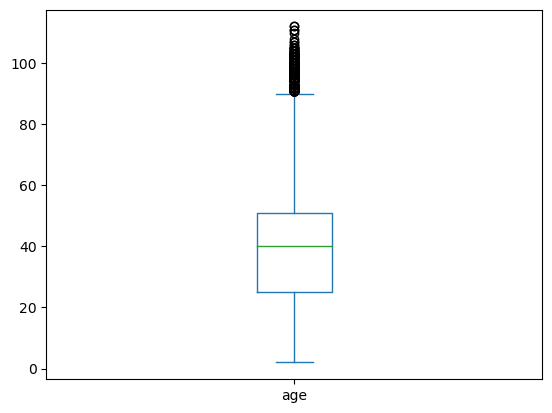

In [14]:
df['age'].plot(kind = 'box')

In [15]:
print("min:" ,df['age'].min())
print("max:" ,df['age'].max())

min: 2
max: 112


### We could see, here the column "Age" has extreme values (outliers), which should be cleaned.
### Here, let's see the percentage of outliers.

In [16]:
age_med = df['age'].median()
age_med

40.0

In [17]:
a = df[(df['age'] < 14)]
a.shape[0]

297

In [18]:
a.shape[0]/54030

0.005496946141032759

In [19]:
a1= df[(df['age']> 90)]
a1.shape[0]

404

In [20]:
a1.shape[0]/df.shape[0]

0.00747732741069776

In [21]:
df.shape[0]

54030

In [22]:
((a.shape[0]+a1.shape[0])/df.shape[0])*100

1.297427355173052

#### As, the outliers constitute about 1.3% of the data, we impute the age of the outliers with median.

In [23]:
age_med = df['age'].median()
age_med

40.0

In [24]:
df.loc[df['age'] < 14, 'age'] = 40
df['age'].min()

14

In [25]:
df.loc[df['age'] > 90, 'age'] = 40
df['age'].max()

90

In [26]:
df['age'].skew()

0.7034560158873467

### The age column is positively skewed

#### There are 7 rows above 1 crore which seems to be an extreme value, so we are dropping those 7 rows in gross income

In [27]:
df['gross_income'].skew()

56.42473063434132

In [28]:
df = df.loc[((df['gross_income']<10000000))]
df.head(4)

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440


In [29]:
df['gross_income'].skew()

24.048370800322555

### Converting "Duration" column to "Month" to have a better understanding of the data.

In [30]:
df['Month']= round((df['duration']/30),2)

C:\Users\hp\AppData\Local\Temp\ipykernel_4236\2781146100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= round((df['duration']/30),2)


In [31]:
df.drop('duration',axis = 1, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4236\367655172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('duration',axis = 1, inplace = True)


In [32]:
df.head(2)

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,Month
0,M,21,79070.91,Individuals,0,0,0,1,0,34.50
1,M,23,178270.68,College_Graduated,0,0,0,1,0,36.57


### Creating a dummy variable for the columns "active_inactive_start" & "active_inactive_end"

In [33]:
df['Active to Inactive'] = df['active_inactive_start'].apply(lambda x: 'Active' if x == 1 else 'Inactive')

C:\Users\hp\AppData\Local\Temp\ipykernel_4236\62352734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Active to Inactive'] = df['active_inactive_start'].apply(lambda x: 'Active' if x == 1 else 'Inactive')


In [34]:
df['Inactive to Active'] = df['active_inactive_end'].apply(lambda x: 'Active' if x == 1 else 'Inactive')

C:\Users\hp\AppData\Local\Temp\ipykernel_4236\3758731045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inactive to Active'] = df['active_inactive_end'].apply(lambda x: 'Active' if x == 1 else 'Inactive')


In [35]:
df.head(1)

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,Month,Active to Inactive,Inactive to Active
0,M,21,79070.91,Individuals,0,0,0,1,0,34.5,Inactive,Inactive


In [36]:
cat_vars = []
num_vars = []

for i in df.columns:
    if  df[i].dtype =='object':
        cat_vars.append(i)
    else:
        num_vars.append(i)
print("cat_variables: ",cat_vars)
print("num_variables: ",num_vars)

cat_variables:  ['gender', 'segment', 'Active to Inactive', 'Inactive to Active']
num_variables:  ['age', 'gross_income', 'num_credit_cards', 'active_inactive_start', 'active_inactive_end', 'num_products', 'num_loans', 'Month']


## Univariate for Categorical & Numerical Variables

In [40]:
df['gender'].value_counts()

F    29676
M    24347
Name: gender, dtype: int64

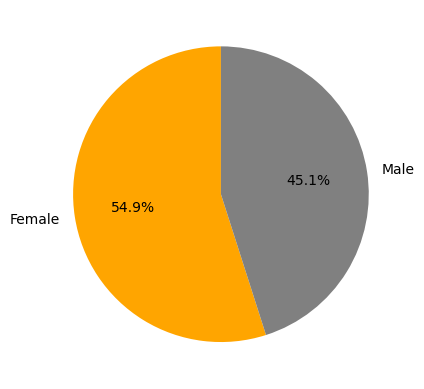

In [41]:
# With this function we can Visually see Gender wise Summary for Categorical variables.
plt.pie(df['gender'].value_counts(), labels = ['Female','Male'], autopct='%1.1f%%', startangle = 90,colors =['orange', 'grey']);

**Female customers are more as compared to male customers**

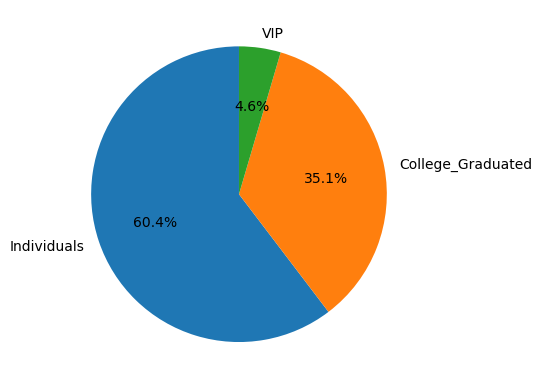

In [42]:
# With this function we can Visually see Segment wise Summary for Categorical variables.
plt.pie(df['segment'].value_counts('segment'), labels = df['segment'].unique(), autopct='%1.1f%%', startangle = 90);

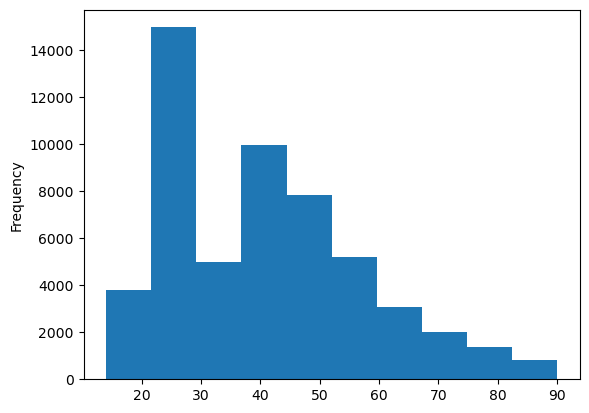

In [43]:
# With this function we can Visually see Age wise Summary for Numerical variables.
df['age'].plot(kind = 'hist');

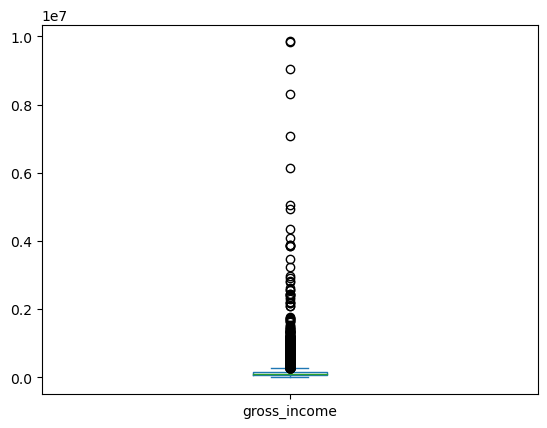

In [44]:
# With this function we can Visually see gross_income wise Summary for Numerical variables.
df['gross_income'].plot(kind = 'box');

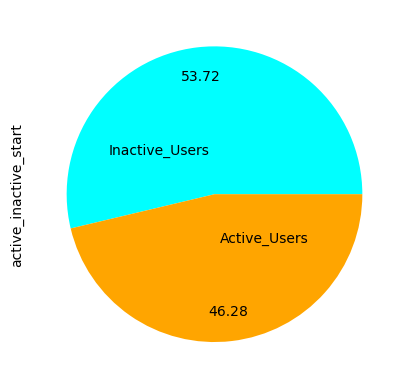

In [45]:
# With this function we can Visually see active_inactive_start wise Summary for Numerical variables.
df['active_inactive_start'].value_counts().plot(kind = 'pie', labels = ['Inactive_Users','Active_Users'],pctdistance = 0.8,autopct='%.2f',labeldistance = 0.3,colors = ['cyan','orange'] );

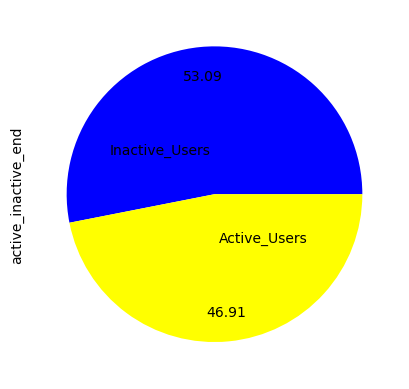

In [46]:
# With this function we can Visually see active_inactive_end wise Summary for Numerical variables.
df['active_inactive_end'].value_counts().plot(kind = 'pie', labels = ['Inactive_Users','Active_Users'],pctdistance = 0.8,autopct='%.2f',labeldistance = 0.3,colors = ['blue','yellow'] );

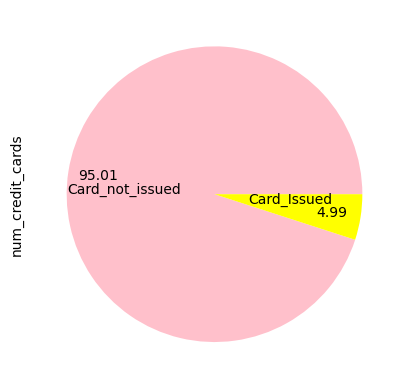

In [47]:
# With this function we can Visually see number of credit cards wise Summary for Numerical variables.
df['num_credit_cards'].value_counts().plot(kind = 'pie', labels = ['Card_not_issued','Card_Issued'],pctdistance = 0.8,autopct='%.2f',labeldistance = 0.23,colors = ['pink','yellow'] );

#### As the data says, 95% of the customers do not have credit card.

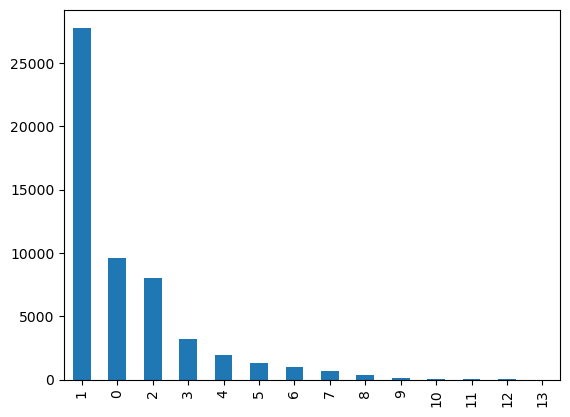

In [48]:
# With this function we can Visually see the "Total number of financial products that the customer has bought."
df['num_products'].value_counts().plot(kind = 'bar');

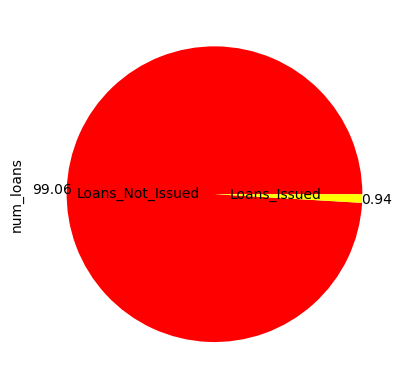

In [49]:
## With this function we can Visually see the Total number of loans disbursed to the customer
df['num_loans'].value_counts().plot(kind = 'pie', labels = ['Loans_Not_Issued','Loans_Issued'],pctdistance = 1.1,autopct='%1.2f',labeldistance = 0.1,colors = ['red','yellow'] );

#### We can see that 99% of the customers dont have any loans

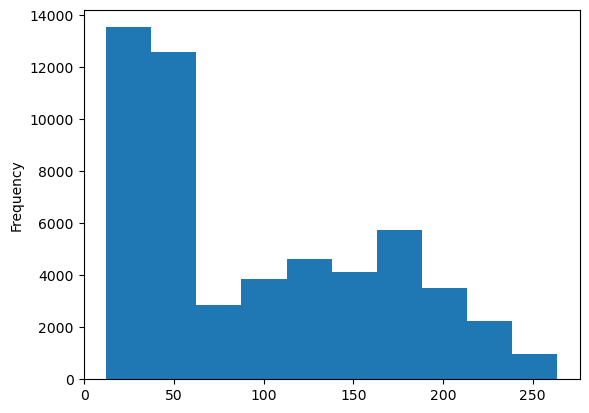

In [50]:
## With this function we can Visually see the Number of days since customer had started an account.
df['Month'].plot( kind= 'hist');

C:\Users\hp\AppData\Local\Temp\ipykernel_4236\832623346.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
C:\Users\hp\AppData\Local\Temp\ipykernel_4236\832623346.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)


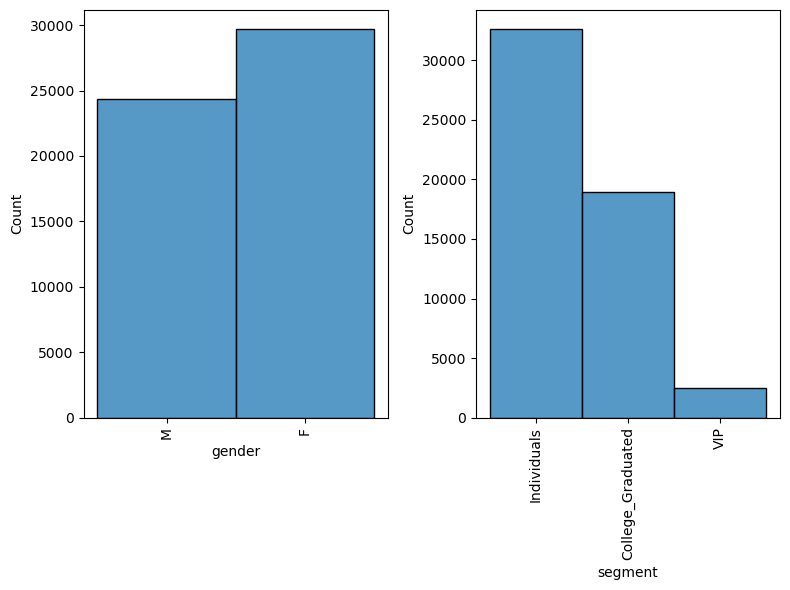

In [51]:
 ## list of categorical variables together
cat_vars = ['gender','segment']

    ## create figure with subplots
fig, axs = plt.subplots(nrows=1,ncols = 2,figsize=(8,6))
axs = axs.flatten()

    ## create histplot for each categorical var
for i, var in enumerate(cat_vars):
    sns.histplot(x = var, data = df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

    ## adjusting spacing between  subplots 
fig.tight_layout()

plt.show()

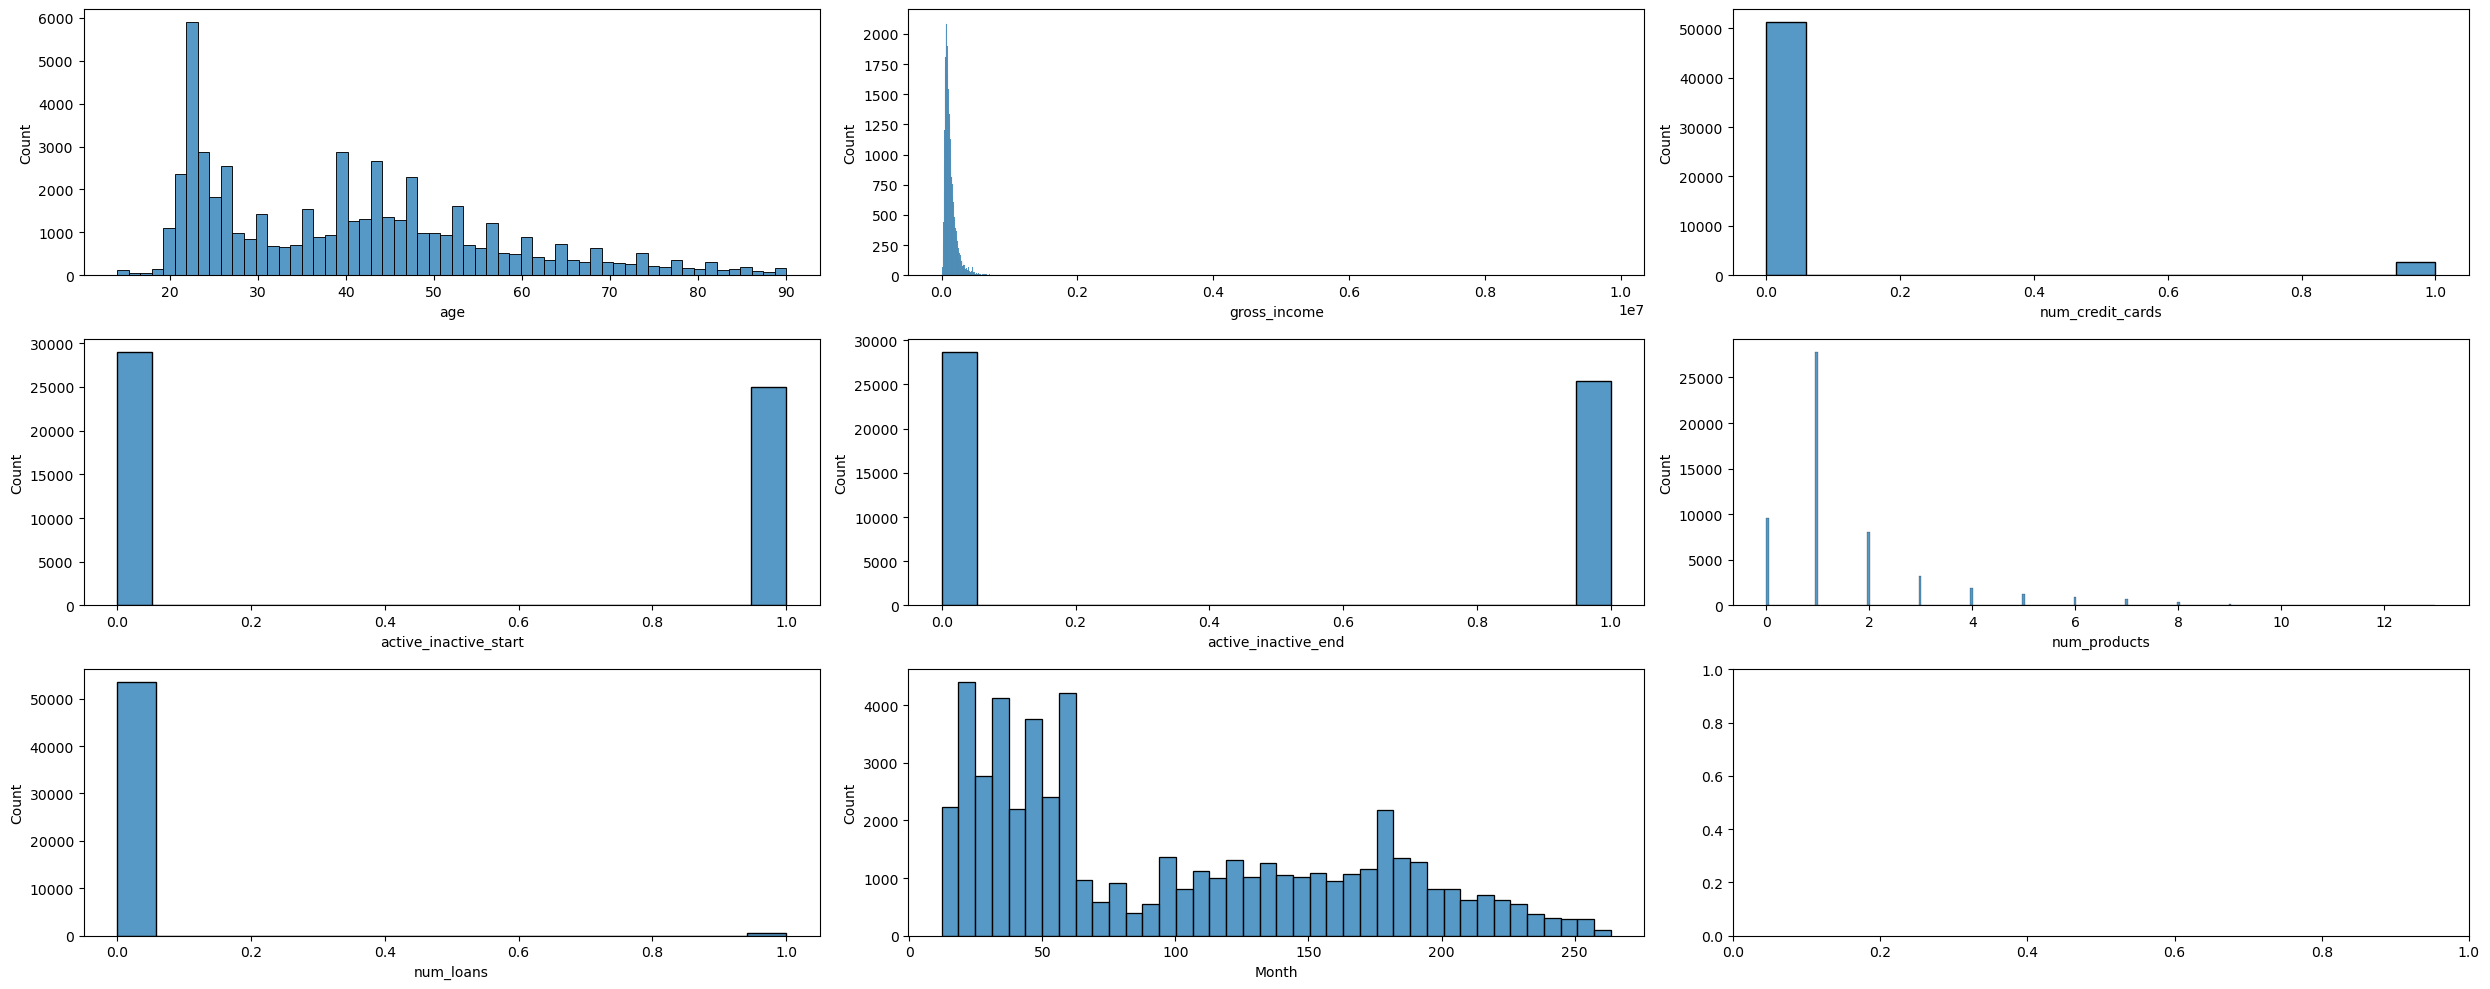

In [52]:
## List of Numerical Variables Together
num_vars = ['age', 'gross_income', 'num_credit_cards', 'active_inactive_start', 'active_inactive_end', 'num_products', 'num_loans', 'Month']

fig, axs = plt.subplots(nrows= 3,ncols = 3,figsize = (25,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x = var, data  = df, ax = axs[i])
    
fig.tight_layout()
plt.show()

## Bivariate Analysis

Gender wise analysis with Numerical variables

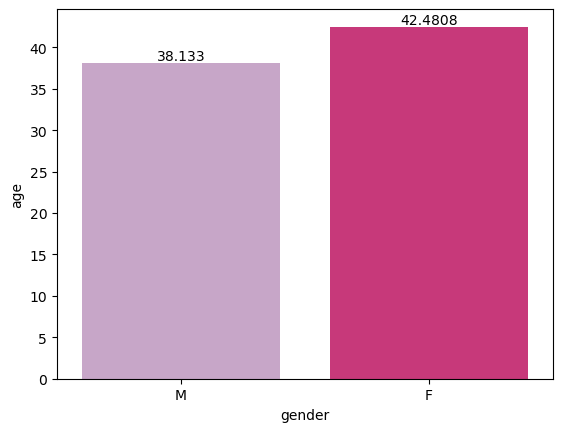

In [53]:
ax = sns.barplot(x = 'gender', y = 'age', data = df, errorbar=None, palette ='PuRd')
ax.bar_label(ax.containers[0]);

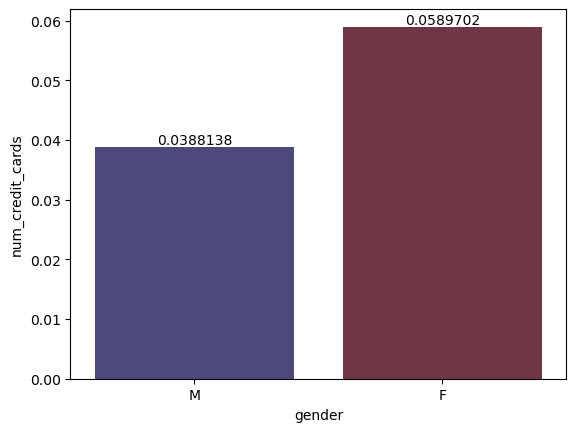

In [54]:
ax = sns.barplot(x = 'gender', y = 'num_credit_cards', data = df, errorbar = None, palette ='icefire');
ax.bar_label(ax.containers[0]);

### Male average - 4
### Females average - 6 CC

In [55]:
df.columns

Index(['gender', 'age', 'gross_income', 'segment', 'num_credit_cards',
       'active_inactive_start', 'active_inactive_end', 'num_products',
       'num_loans', 'Month', 'Active to Inactive', 'Inactive to Active'],
      dtype='object')

In [56]:
## Segregating the data gender wise to check how males are active and inactive

df_male = df[df['gender'] == 'M'].groupby(df['Active to Inactive']).count()

#df_male['gender'].groupby(df_male['active_inactive_start']).count()
df_male['Active to Inactive']

Active to Inactive
Active      10371
Inactive    13976
Name: Active to Inactive, dtype: int64

In [57]:
#### Active/Inactive status of a male

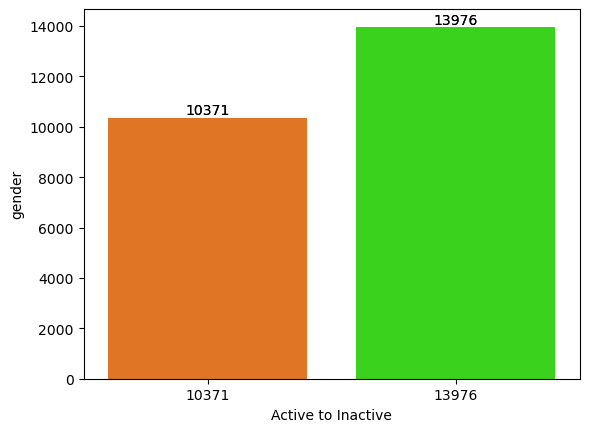

In [58]:
ax = sns.barplot(x = df_male['Active to Inactive'] , y = df_male['gender'],data = df, errorbar = None, palette ='gist_ncar_r')
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

#### Female : The number of active Males are : 10371

#### The number of inactive Males are : 13976

In [59]:
## Segregating the data gender wise to check how many Females are active and inactive

df_female = df[df['gender'] == 'F'].groupby(df['Active to Inactive']).count()

#df_male['gender'].groupby(df_male['active_inactive_start']).count()
df_female['Active to Inactive']

Active to Inactive
Active      14630
Inactive    15046
Name: Active to Inactive, dtype: int64

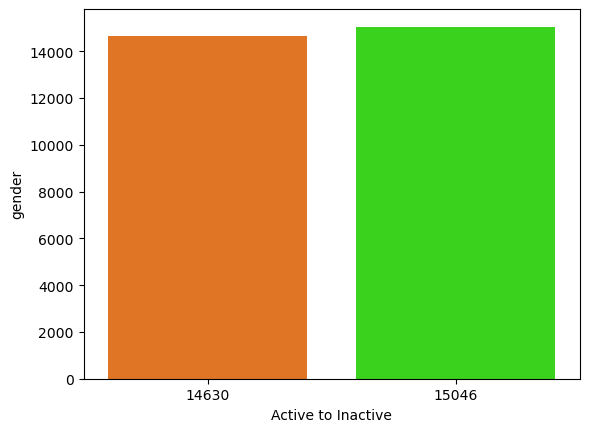

In [60]:
sns.barplot(x = df_female['Active to Inactive'] , y = df_female['gender'],data = df, errorbar = None, palette ='gist_ncar_r')
ax.bar_label(ax.containers[0]);

#### Female : The number of active Females are : 14630
#### The number of inactive Females are : 15046
#### We can clearly say that Females Active/Inactive Start ratio is better then Males.

In [61]:
df_male_e = df[df['gender'] == 'M'].groupby(df['Inactive to Active']).count()
df_male_e['Inactive to Active']

Inactive to Active
Active      10692
Inactive    13655
Name: Inactive to Active, dtype: int64

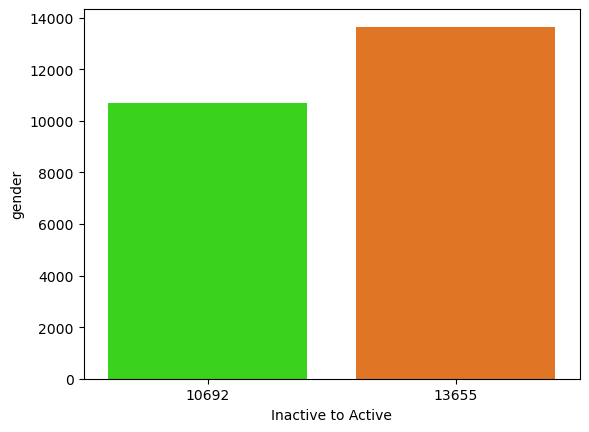

In [62]:
sns.barplot(x = df_male_e['Inactive to Active'] , y = df_male_e['gender'],data = df, errorbar = None, palette ='gist_ncar');
#ax.bar_label(ax.containers[0]);

### Male : Around 13655 males are inactive where in only 10693 are active by the end of six months

In [63]:
df_female_e = df[df['gender'] == 'F'].groupby(df['Inactive to Active']).count()
df_female_e['Inactive to Active']

Inactive to Active
Active      14649
Inactive    15027
Name: Inactive to Active, dtype: int64

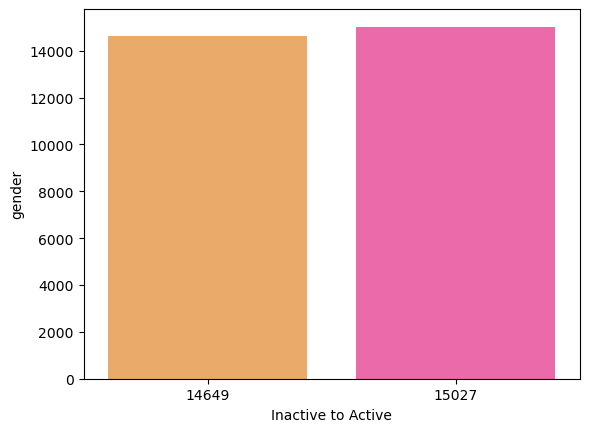

In [64]:
sns.barplot(x = df_female_e['Inactive to Active'] , y = df_female_e['gender'], errorbar =None, palette ='spring_r');
#ax.bar_label(ax.containers[0]);

### Female : The number of active Females are : 14649
###         The number of inactive Females are : 15027   
### We can clearly say that Females Active/Inactive End ratio is better then Males as well.
### Compared to males, females are more Active and Stable users.

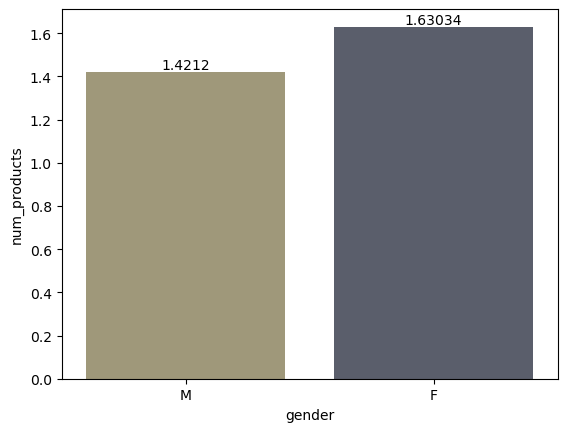

In [65]:
ax = sns.barplot(x = 'gender', y = 'num_products', data = df, errorbar = None, palette ='cividis_r')
ax.bar_label(ax.containers[0]);

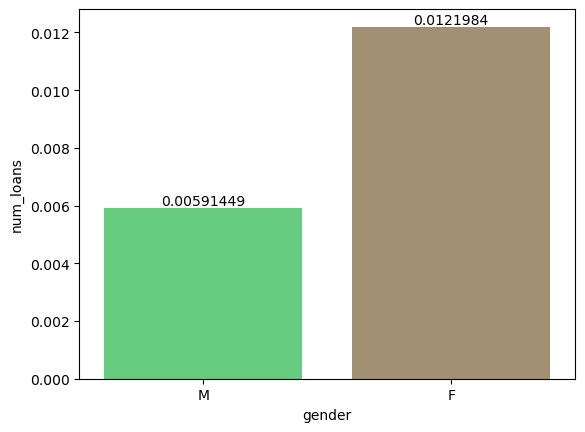

In [66]:
ax = sns.barplot(x = 'gender', y = 'num_loans', data = df, errorbar=None, palette ='terrain')
ax.bar_label(ax.containers[0]);

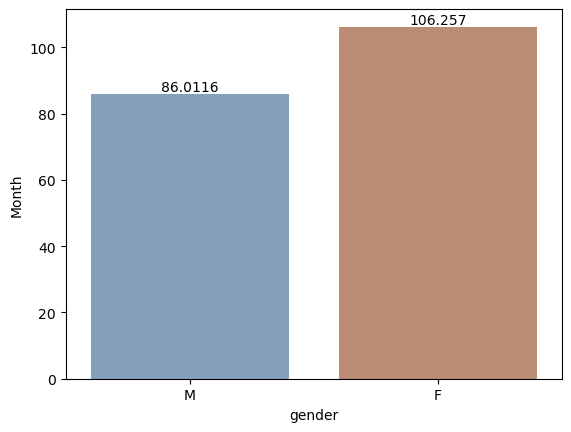

In [67]:
ax = sns.barplot(x = 'gender', y = 'Month', data = df, errorbar=None, palette ='twilight_shifted')
ax.bar_label(ax.containers[0]);

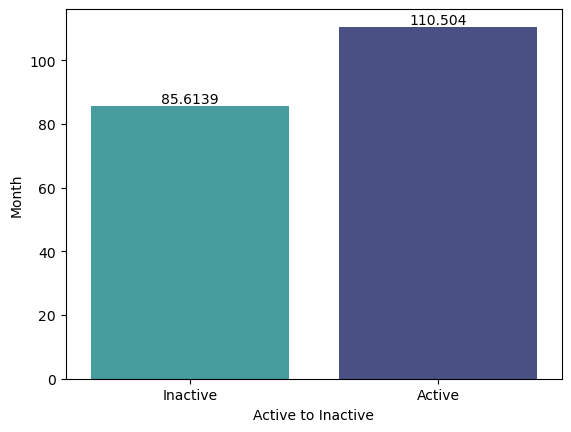

In [68]:
ax = sns.barplot(y = 'Month', x = 'Active to Inactive', data = df,errorbar = None, palette = 'mako_r');
ax.bar_label(ax.containers[0]);

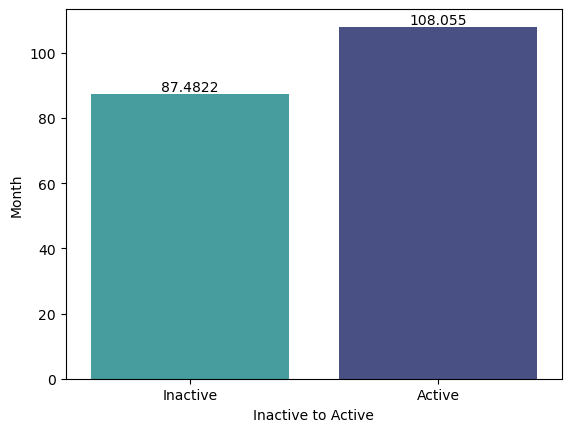

In [69]:
ax = sns.barplot(y = 'Month', x = 'Inactive to Active', data = df,errorbar = None, palette = 'mako_r');
ax.bar_label(ax.containers[0]);

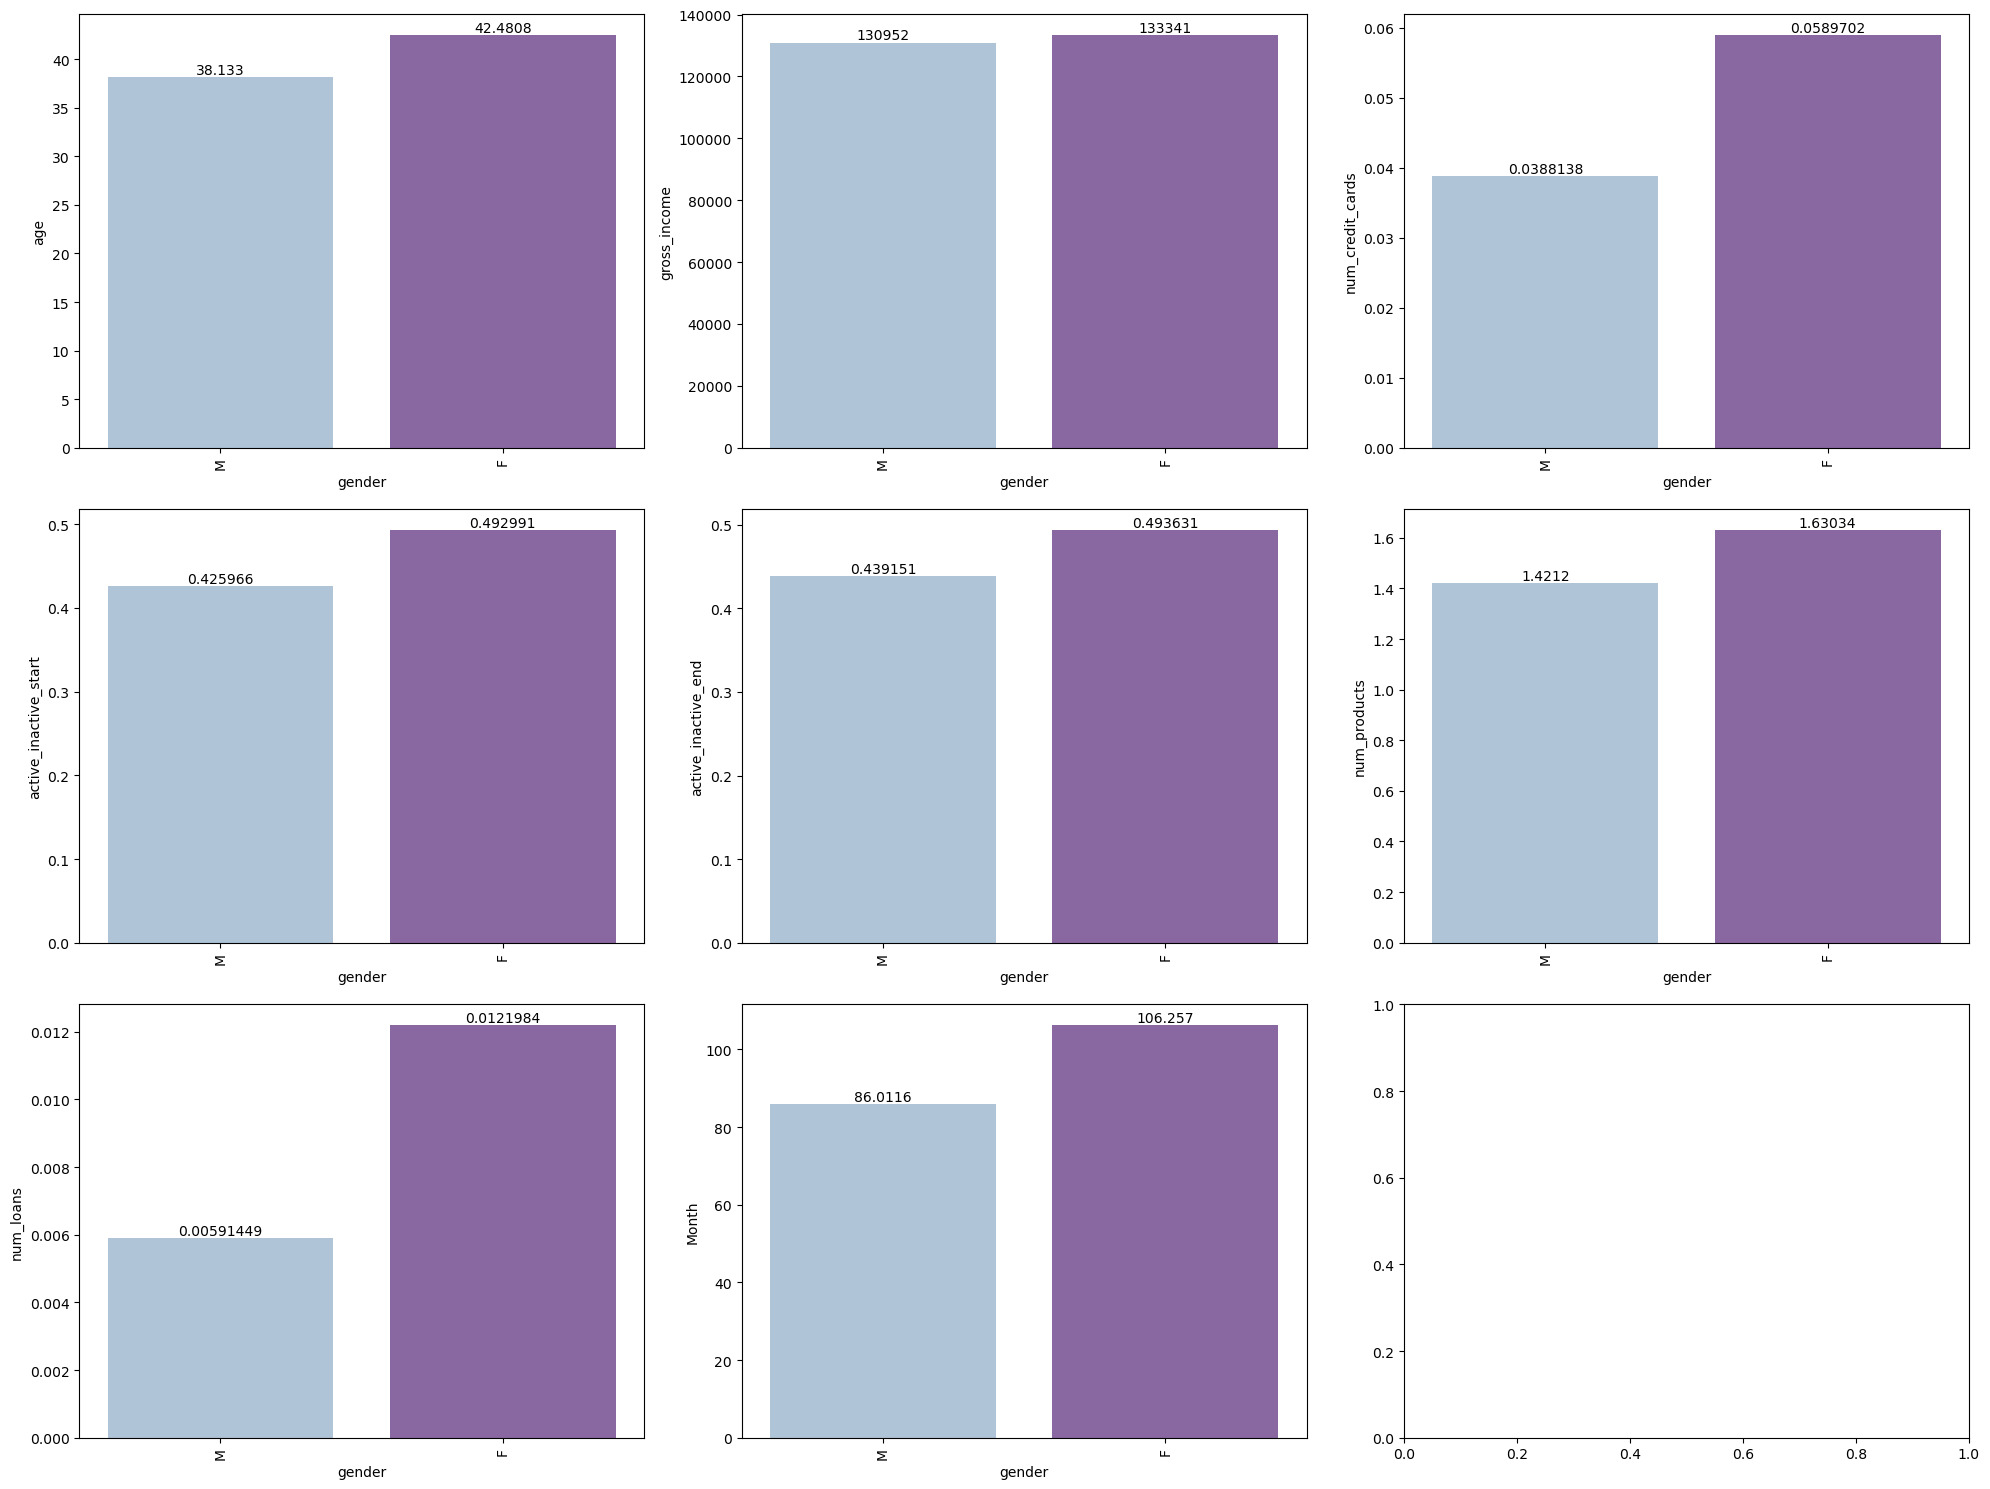

In [70]:
## list of numerical variables when compared to Gender Variable
num_vars = ['age', 'gross_income', 'num_credit_cards', 'active_inactive_start', 'active_inactive_end', 'num_products', 'num_loans', 'Month']

## create figure with subplots
fig, axs = plt.subplots(nrows=3,ncols = 3,figsize=(20,15))
axs = axs.flatten()

## create barplot for each numerical var
for i, var in enumerate(num_vars):
    ax = sns.barplot(x = 'gender', y = var, data = df, ax=axs[i], errorbar=None, palette ='BuPu')
    ax.bar_label(ax.containers[0])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

## adjusting spacing between  subplots 
fig.tight_layout()

plt.show()

**Segment wise analysis on numerical variables**

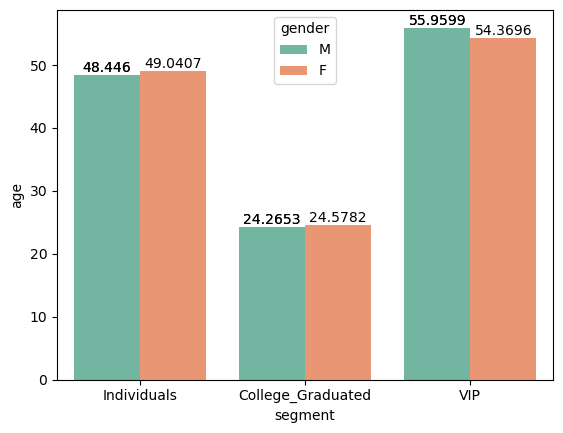

In [71]:
ax = sns.barplot(x = 'segment', y = 'age', data = df,hue = 'gender', errorbar = None,palette ='Set2')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

In [72]:
#By univariant/bi variant analysis we can see that there are more no. of young people who are in the age 
#between 14 to 25(college graduates) where as less number of people 
#who are in the age between 26 to 50 which are individuals(segements)
#who are in the age btw 51 to 90 (vip) 

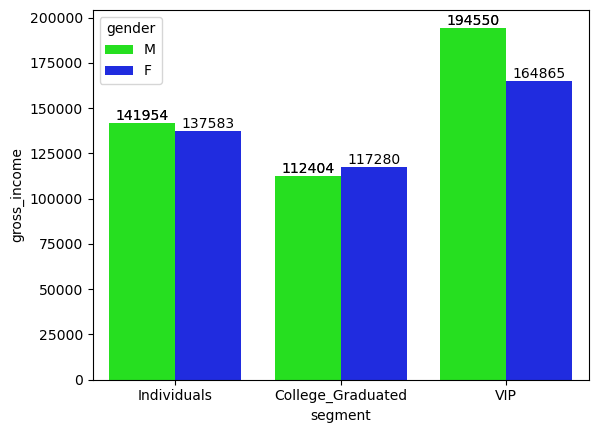

In [73]:
ax = sns.barplot(x = 'segment', y = 'gross_income',hue = 'gender', data = df, errorbar=None,palette ='hsv')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

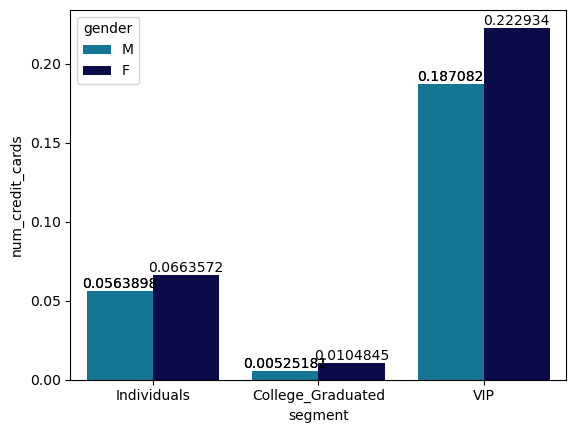

In [74]:
ax = sns.barplot(x = 'segment', y = 'num_credit_cards',hue = 'gender',data = df, errorbar = None,palette ='ocean_r')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

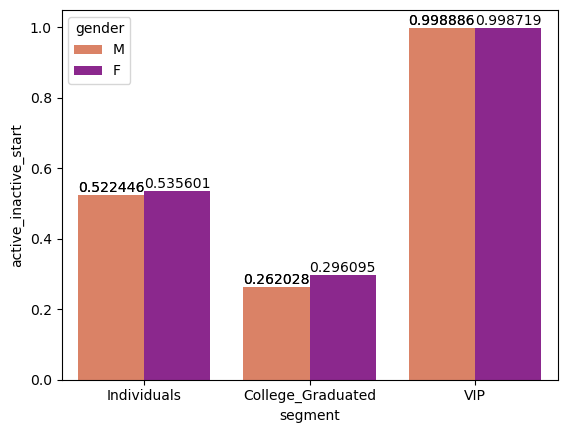

In [75]:
ax = sns.barplot(x = 'segment', y = 'active_inactive_start',hue = 'gender', data = df, errorbar=None, palette ='plasma_r')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

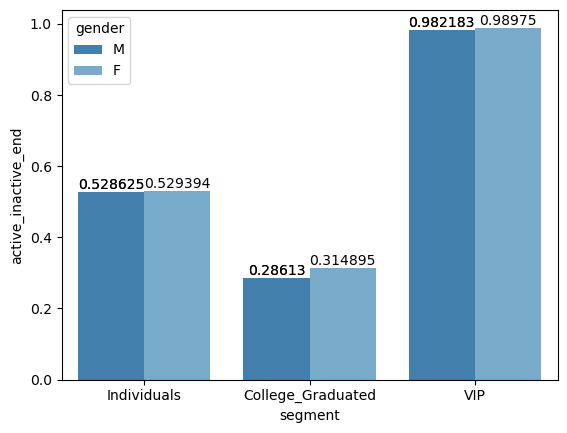

In [76]:
ax = sns.barplot(x = 'segment', y = 'active_inactive_end',hue = 'gender', data = df, errorbar=None, palette ='tab20c')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

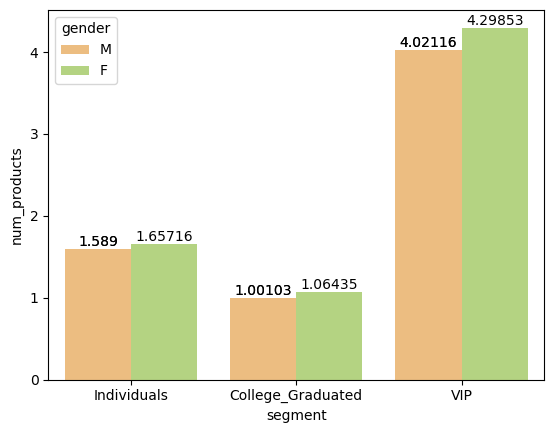

In [77]:
ax = sns.barplot(x = 'segment', y = 'num_products',hue = 'gender', data = df, errorbar=None, palette ='RdYlGn')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

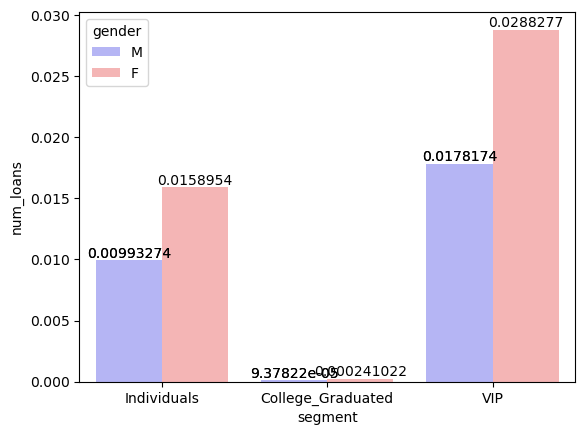

In [78]:
ax = sns.barplot(x = 'segment', y = 'num_loans',hue = 'gender', data = df, errorbar=None, palette ='bwr')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

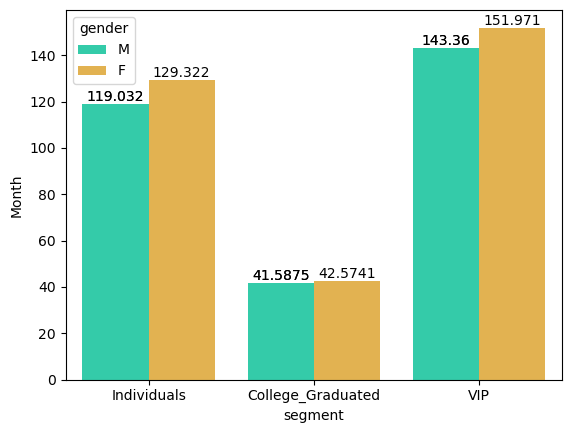

In [79]:
ax = sns.barplot(x = 'segment', y = 'Month',hue = 'gender', data = df, errorbar=None, palette ='turbo')
ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,);

[Text(0, 0, '0.760401'), Text(0, 0, '2.52502')]

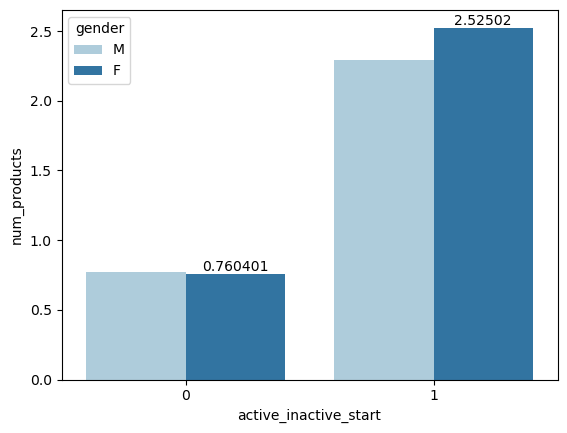

In [80]:
ax =sns.barplot(x = 'active_inactive_start', y = 'num_products',hue= 'gender', errorbar = None ,data = df,palette ='Paired')
ax.bar_label(ax.containers[1])

<Axes: xlabel='active_inactive_start', ylabel='num_loans'>

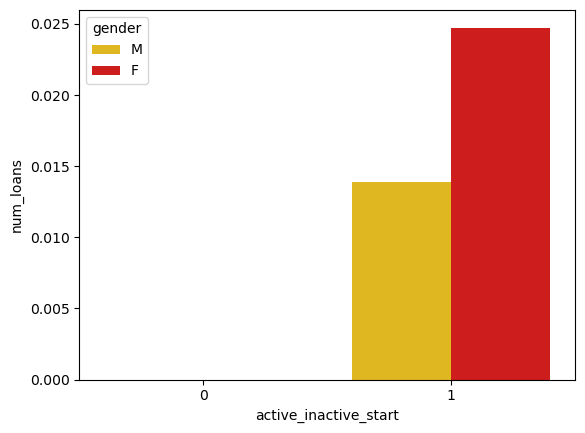

In [81]:
sns.barplot(x = 'active_inactive_start', y = 'num_loans',hue= 'gender', errorbar = None ,data = df,palette ='hot_r')

<Axes: xlabel='active_inactive_end', ylabel='num_loans'>

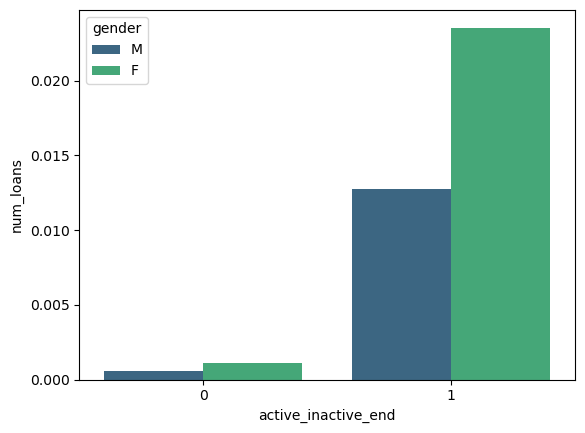

In [82]:
sns.barplot(x = 'active_inactive_end', y = 'num_loans',hue= 'gender', errorbar = None ,data = df,palette ='viridis')

[Text(0, 0, '0.716377'), Text(0, 0, '2.56789')]

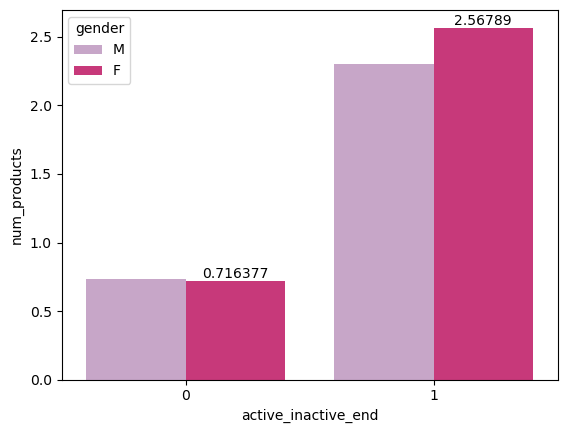

In [83]:
ax =sns.barplot(x = 'active_inactive_end', y = 'num_products',hue= 'gender', errorbar = None ,data = df,palette ='PuRd')
ax.bar_label(ax.containers[1])

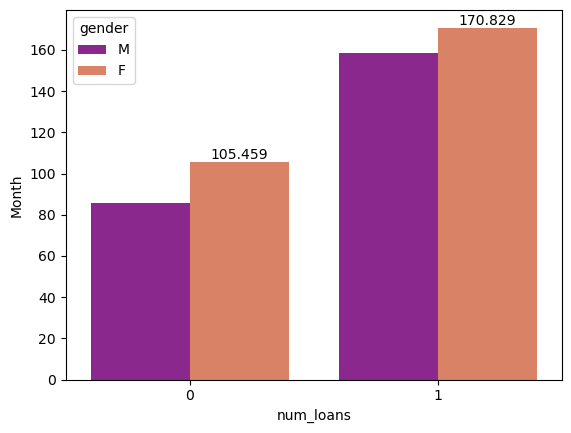

In [84]:
ax = sns.barplot(x = 'num_loans', y = 'Month',hue= 'gender', errorbar = None ,data = df,palette ='plasma')
ax.bar_label(ax.containers[1]);

<Axes: xlabel='num_products', ylabel='Month'>

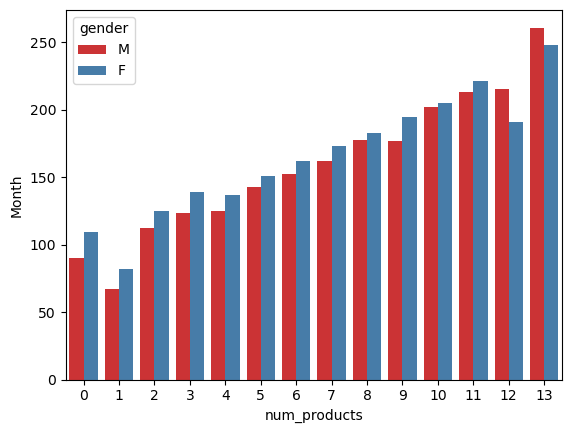

In [85]:
sns.barplot(y = 'Month', x = 'num_products',errorbar= None,hue = 'gender', data = df,palette ='Set1')

### Month and num_products are positively correlated

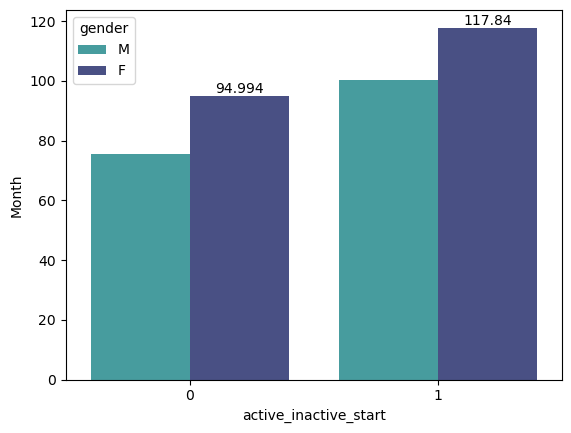

In [86]:
ax = sns.barplot(y = 'Month', x = 'active_inactive_start', data = df, hue = 'gender',errorbar = None, palette = 'mako_r');
ax.bar_label(ax.containers[1]);

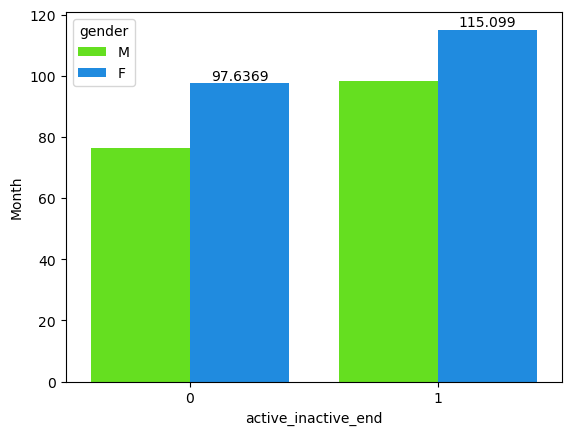

In [89]:
ax = sns.barplot(y = 'Month', x = 'active_inactive_end', data = df, hue = 'gender',errorbar = None, palette = 'gist_rainbow');
ax.bar_label(ax.containers[1]);

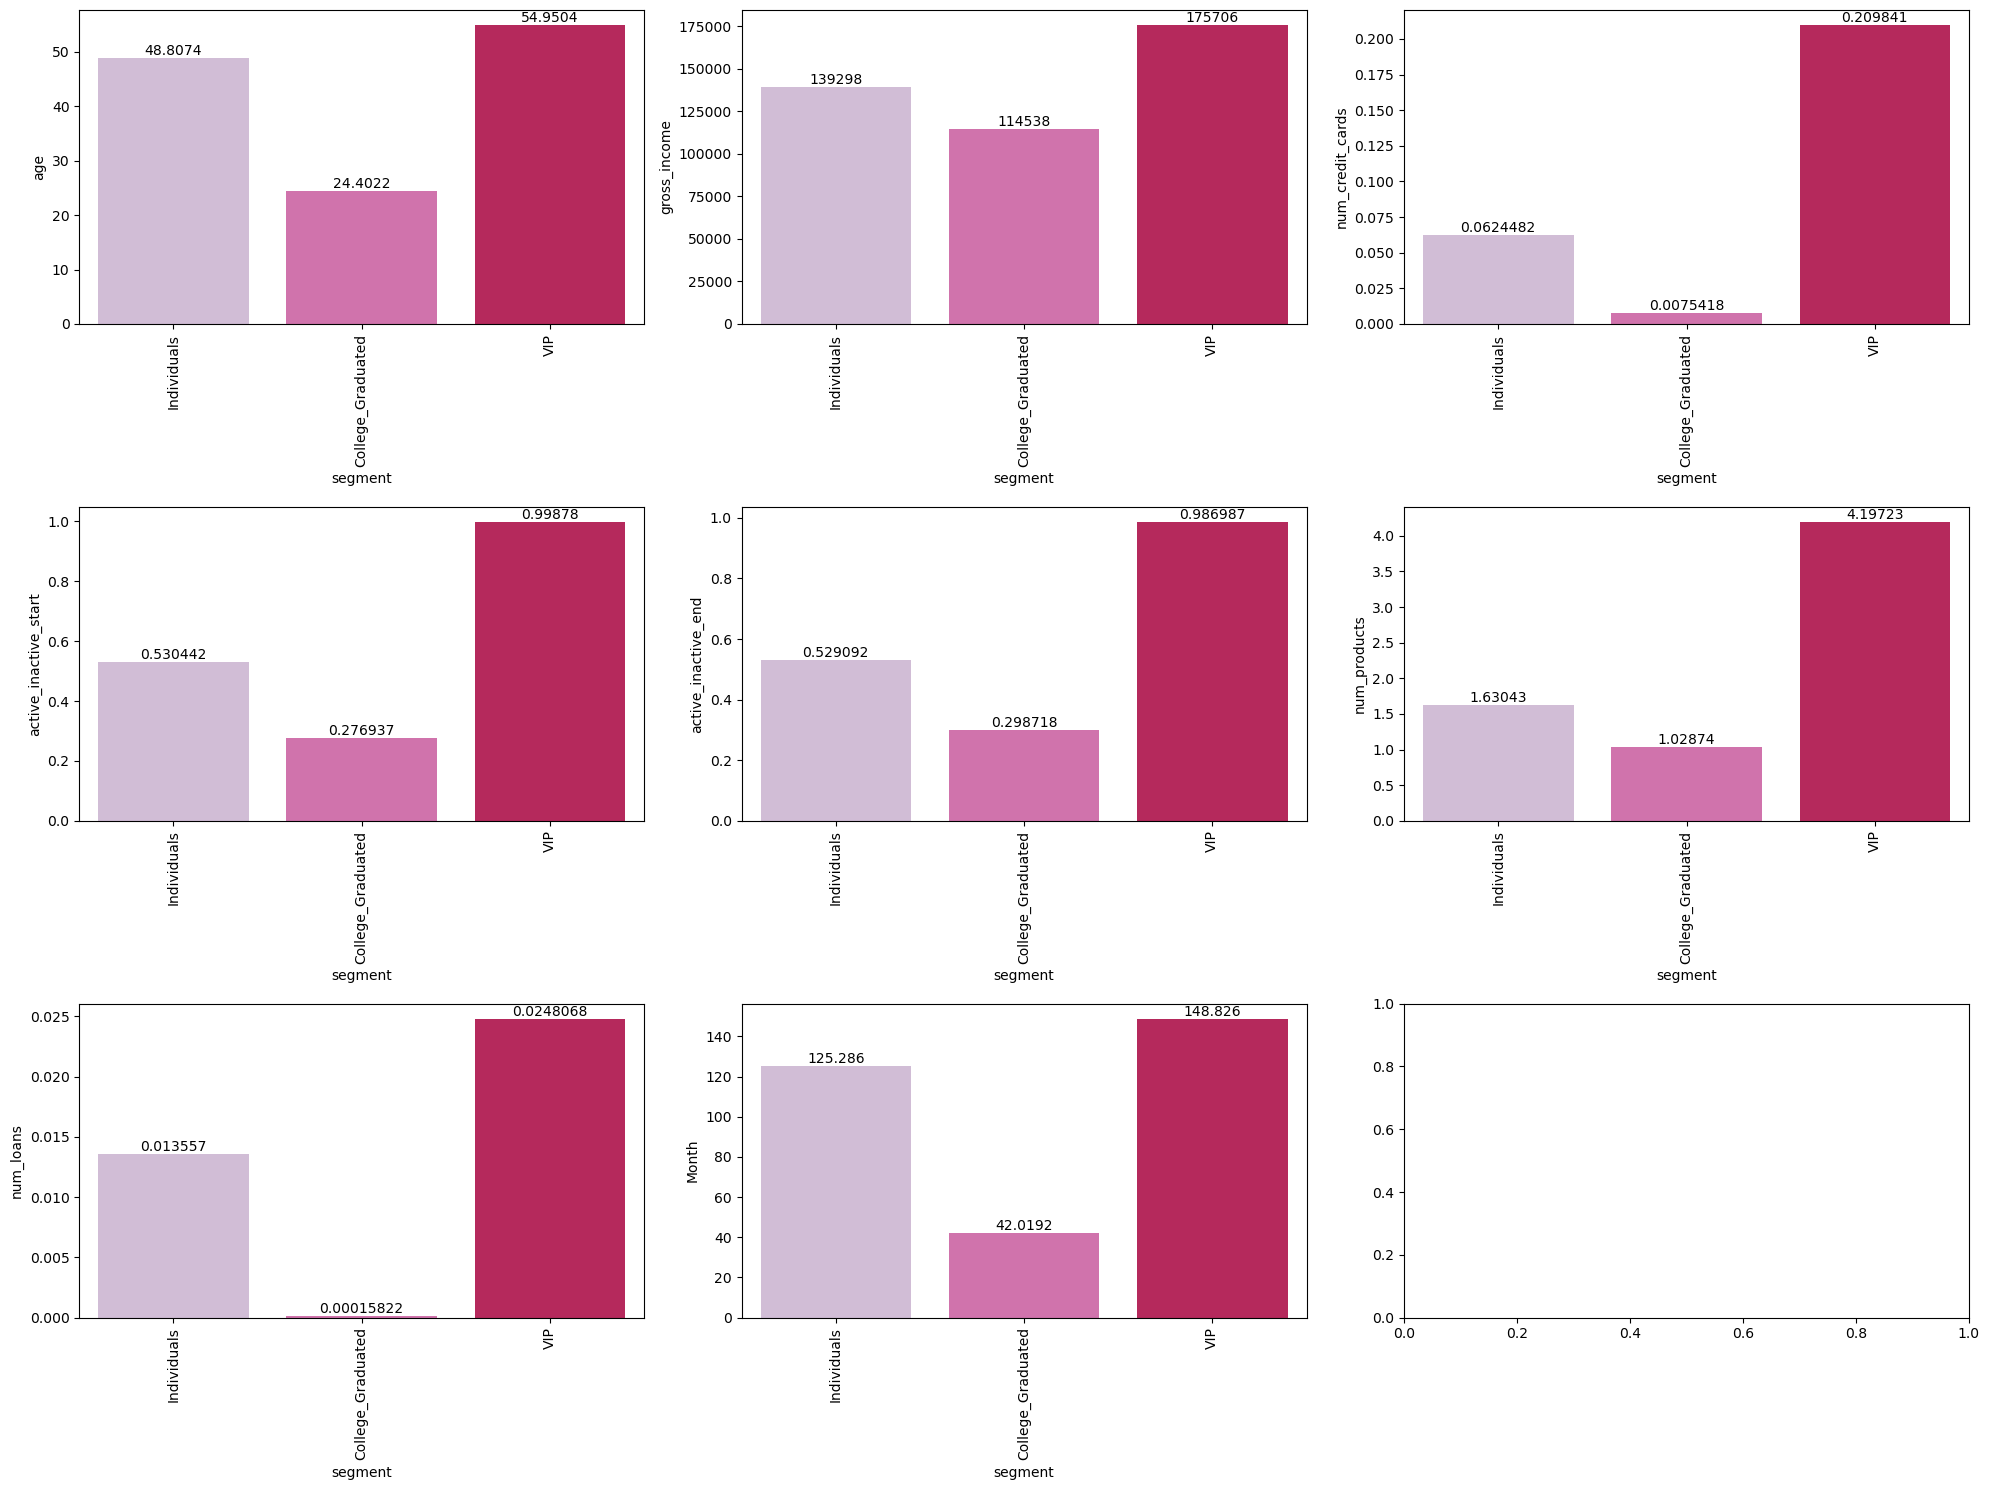

In [90]:
## list of numerical variables
num_vars = ['age', 'gross_income', 'num_credit_cards', 'active_inactive_start', 'active_inactive_end', 'num_products', 'num_loans', 'Month']

## create figure with subplots
fig, axs = plt.subplots(nrows=3,ncols = 3,figsize=(20,15))
axs = axs.flatten()

## create barplot for each numerical var
for i, var in enumerate(num_vars):
    ax = sns.barplot(x = 'segment', y = var, data = df, ax=axs[i], errorbar=None,palette = 'PuRd')
    ax.bar_label(ax.containers[0])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

## adjusting spacing between  subplots 
fig.tight_layout()

plt.show()

<Axes: >

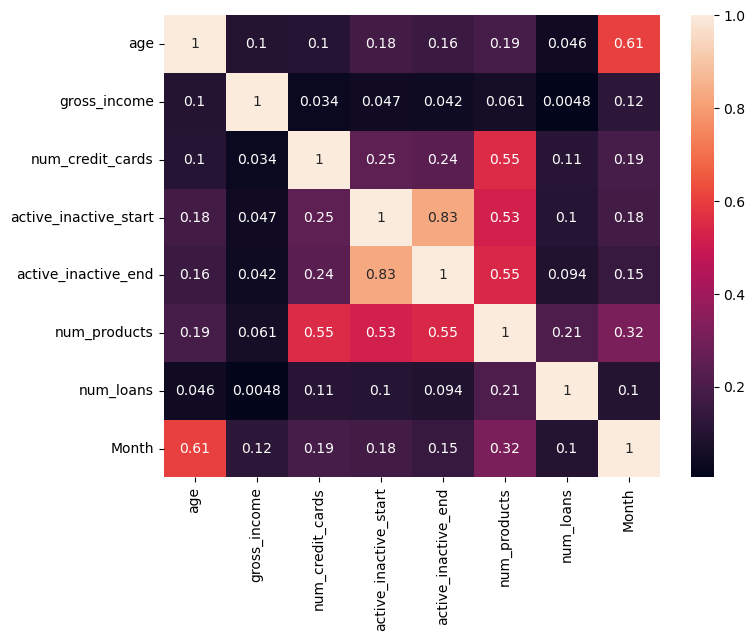

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)

## Inferences


**> We can see that Number of credit cards and Number of Financial products are moderately related to each other**  
**> Duration and age are also corelated**
**> More the products, more the active status of a customer.  
**> Also Number of Products and Active_inactive_start | Active_inactive_end are precisely related**


## Section 04: KPI/ Metric based questions – These questions have a specific ask (pin-pointed) and getting to the required outcome is quite straightforward. 


1. What % of customers were active before the 6 months period. What was this % at the end of 6 
months period?


### Answer to Question 1

% of customers were active at the beginning of 6 months period : 46.27843696203469

% customers were active at the end of 6 months period : 46.90779853025563

In [92]:
df['active_inactive_start'].shape[0]

54023

In [93]:
df['active_inactive_start'].value_counts()

0    29022
1    25001
Name: active_inactive_start, dtype: int64

In [94]:
df['active_inactive_end'].value_counts()

0    28682
1    25341
Name: active_inactive_end, dtype: int64

In [95]:
(df['active_inactive_start'].value_counts()[1]/df['active_inactive_start'].shape[0])*100

46.27843696203469

In [96]:
(df['active_inactive_end'].value_counts()[1]/df['active_inactive_end'].shape[0])*100

46.90779853025563

## Around 46% of customers tend to be active.
## There is not much difference in the % of customers who were active before the 6 months period and at the end of 6 months period?

=====================================================================================================================

2. Get the count of below customers:

I. Customers who remained active

II. Customers who remained inactive

III. Active customers who became inactive

IV. Inactive customers who became active

In [97]:
active_cust = df[(df['active_inactive_start']== 1) & (df['active_inactive_end']== 1)].shape[0]
inactive_cust = df[(df['active_inactive_start']== 0) & (df['active_inactive_end']== 0)].shape[0]
actv_to_inact_cust = df[(df['active_inactive_start']== 1) & (df['active_inactive_end']== 0)].shape[0]
inact_to_actv_cust = df[(df['active_inactive_start']== 0) & (df['active_inactive_end']== 1)].shape[0]

### Answer to Question 2:

Customers who remained active : 22903
    
Customers who remained inactive : 26584
    
Active customers who became inactive : 2098
    
Inactive customers who became active : 2438

#### Seems to be like inactive customers are slightly higher than the active customers

#### Seems to be like inactive_to_active_customer are slightly higher than the active_to_inactive_customer.

=====================================================================================================================

3. For the Four types of customers identified above, perform a comparison on the below metrics 
and report any significant difference

I. Average of gross income

II. Average of age

III. Average of duration

IV. Average of num_credit_cards

V. Average of num_loans

In [98]:
active_cust1 = df[(df['active_inactive_start']== 1) & (df['active_inactive_end']== 1)]
inactive_cust1 = df[(df['active_inactive_start']== 0) & (df['active_inactive_end']== 0)]
actv_to_inact_cust1 = df[(df['active_inactive_start']== 1) & (df['active_inactive_end']== 0)]
inact_to_actv_cust1 = df[(df['active_inactive_start']== 0) & (df['active_inactive_end']== 1)]

Text(0.5, 1.0, 'Active_Customers (gender_based)')

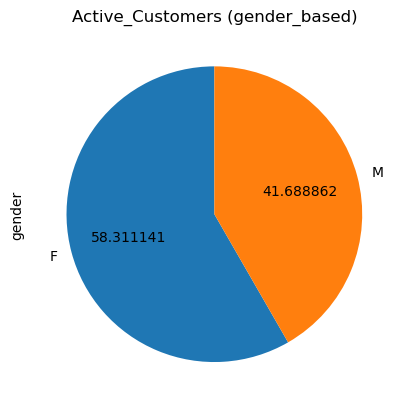

In [99]:
active_cust1['gender'].value_counts().plot(kind = 'pie',startangle = 90,autopct = '%2f')
plt.title("Active_Customers (gender_based)")

Text(0.5, 1.0, 'Inactive_Customers (gender_based)')

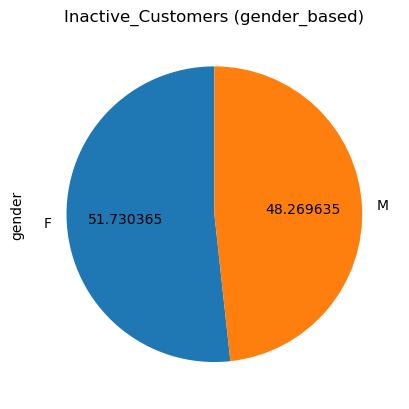

In [100]:
inactive_cust1['gender'].value_counts().plot(kind = 'pie',startangle = 90,autopct = '%2f')
plt.title("Inactive_Customers (gender_based)")

Text(0.5, 1.0, 'Active_Customers (gender_based)')

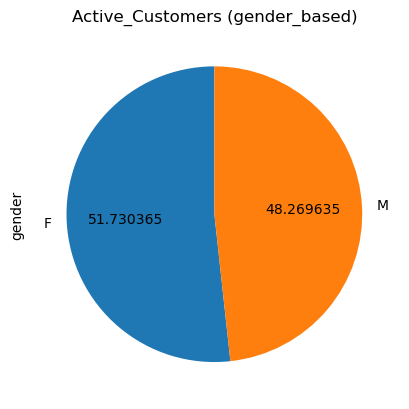

In [101]:
inactive_cust1['gender'].value_counts().plot(kind = 'pie',startangle = 90,autopct = '%2f')
plt.title("Active_Customers (gender_based)")

#### I. Average of gross income

In [102]:
##Average of gross income
print("Active_Customers (Gross_Income) :"  ,active_cust1['gross_income'].mean())
print("Inactive_Customers (Gross_Income) :"  ,inactive_cust1['gross_income'].mean())
print("Active_to_Inactive_Customers (Gross_Income) :"  ,actv_to_inact_cust1['gross_income'].mean())
print("Inactive_to_Active_Customers (Gross_Income) :"  ,inact_to_actv_cust1['gross_income'].mean())

Active_Customers (Gross_Income) : 140800.2485464779
Inactive_Customers (Gross_Income) : 125685.11999209992
Active_to_Inactive_Customers (Gross_Income) : 133109.92582936108
Inactive_to_Active_Customers (Gross_Income) : 123093.65686218227


#### II. Average of age

In [103]:
print("Active_Customers (Age) :"  ,active_cust1['age'].mean())
print("Inactive_Customers (Age) :"  ,inactive_cust1['age'].mean())
print("Active_to_Inactive_Customers (Age) :"  ,actv_to_inact_cust1['age'].mean())
print("Inactive_to_Active_Customers (Age) :"  ,inact_to_actv_cust1['age'].mean())

Active_Customers (Age) : 43.7042745491857
Inactive_Customers (Age) : 37.609012940114354
Active_to_Inactive_Customers (Age) : 43.93231649189705
Inactive_to_Active_Customers (Age) : 39.440525020508616


#### III. Average of duration


In [104]:
##Average of duration
print("Active_Customers (Month) :"  ,active_cust1['Month'].mean())
print("Inactive_Customers (Month) :"  ,inactive_cust1['Month'].mean())
print("Active_to_Inactive_Customers (Month) :"  ,actv_to_inact_cust1['Month'].mean())
print("Inactive_to_Active_Customers (Month) :"  ,inact_to_actv_cust1['Month'].mean())

Active_Customers (Month) : 110.16103130594269
Inactive_Customers (Month) : 85.36984501956084
Active_to_Inactive_Customers (Month) : 114.24836510962821
Inactive_to_Active_Customers (Month) : 88.27490566037713


#### IV. Average of num_credit_cards


In [105]:
##Average of num_credit_cards
print("Active_Customers :"  ,active_cust1['num_credit_cards'].mean())
print("Inactive_Customers :"  ,inactive_cust1['num_credit_cards'].mean())
print("Active_to_Inactive_Customers :"  ,actv_to_inact_cust1['num_credit_cards'].mean())
print("Inactive_to_Active_Customers :"  ,inact_to_actv_cust1['num_credit_cards'].mean())


Active_Customers : 0.1167969261668777
Inactive_Customers : 7.523322299127295e-05
Active_to_Inactive_Customers : 0.00667302192564347
Inactive_to_Active_Customers : 0.0016406890894175555


#### V. Average of num_loans

In [106]:
##Average of num_loans
print("Active_Customers (num_loans) :"  ,active_cust1['num_loans'].mean())
print("Inactive_Customers (num_loans) :"  ,inactive_cust1['num_loans'].mean())
print("Active_to_Inactive_Customers (num_loans) :"  ,actv_to_inact_cust1['num_loans'].mean())
print("Inactive_to_Active_Customers (num_loans) :"  ,inact_to_actv_cust1['num_loans'].mean())

Active_Customers (num_loans) : 0.0210016155088853
Inactive_Customers (num_loans) : 0.0
Active_to_Inactive_Customers (num_loans) : 0.011916110581506196
Inactive_to_Active_Customers (num_loans) : 0.0


=================================================================================================================

4. For Female and Male customers, perform a similar comparison on the below metrics and report 
any significant difference:
    
I. Average of gross income

II. Average of age

III. Average of duration

IV. Average of num_credit_cards

V. Average of num_loans

#### I. Average of gross income


In [107]:
print("Active_Customers (Gross_Income - Gender Based)  :"  ,active_cust1['gross_income'].groupby(active_cust1['gender']).mean())
print("Inactive_Customers (Gross_Income - Gender Based) :"  ,inactive_cust1['gross_income'].groupby(inactive_cust1['gender']).mean())
print("Active_to_Inactive_Customers (Gross_Income - Gender Based) :"  ,actv_to_inact_cust1['gross_income'].groupby(actv_to_inact_cust1['gender']).mean())
print("Inactive_to_Active_Customers (Gross_Income - Gender Based) :"  ,inact_to_actv_cust1['gross_income'].groupby(inact_to_actv_cust1['gender']).mean())

Active_Customers (Gross_Income - Gender Based)  : gender
F    139230.910333
M    142995.316816
Name: gross_income, dtype: float64
Inactive_Customers (Gross_Income - Gender Based) : gender
F    127779.646536
M    123440.424775
Name: gross_income, dtype: float64
Active_to_Inactive_Customers (Gross_Income - Gender Based) : gender
F    138336.033224
M    125013.586914
Name: gross_income, dtype: float64
Inactive_to_Active_Customers (Gross_Income - Gender Based) : gender
F    126739.154815
M    118970.165297
Name: gross_income, dtype: float64


#### Average of age

In [108]:
print("Active_Customers (Age - Gender Based)  :"  ,active_cust1['age'].groupby(active_cust1['gender']).mean())
print("Inactive_Customers (Age - Gender Based) :"  ,inactive_cust1['age'].groupby(inactive_cust1['gender']).mean())
print("Active_to_Inactive_Customers (Age - Gender Based) :"  ,actv_to_inact_cust1['age'].groupby(actv_to_inact_cust1['gender']).mean())
print("Inactive_to_Active_Customers (Age - Gender Based) :"  ,inact_to_actv_cust1['age'].groupby(inact_to_actv_cust1['gender']).mean())

Active_Customers (Age - Gender Based)  : gender
F    44.802845
M    42.167679
Name: age, dtype: float64
Inactive_Customers (Age - Gender Based) : gender
F    39.910922
M    35.142067
Name: age, dtype: float64
Active_to_Inactive_Customers (Age - Gender Based) : gender
F    46.412549
M    40.089915
Name: age, dtype: float64
Inactive_to_Active_Customers (Age - Gender Based) : gender
F    41.952859
M    36.598776
Name: age, dtype: float64


#### III. Average of duration

In [109]:
print("Active_Customers (Month - Gender Based)  :"  ,active_cust1['Month'].groupby(active_cust1['gender']).mean())
print("Inactive_Customers (Month - Gender Based) :"  ,inactive_cust1['Month'].groupby(inactive_cust1['gender']).mean())
print("Active_to_Inactive_Customers (Month - Gender Based) :"  ,actv_to_inact_cust1['Month'].groupby(actv_to_inact_cust1['gender']).mean())
print("Inactive_to_Active_Customers (Month - Gender Based) :"  ,inact_to_actv_cust1['Month'].groupby(inact_to_actv_cust1['gender']).mean())

Active_Customers (Month - Gender Based)  : gender
F    116.891590
M    100.746849
Name: Month, dtype: float64
Inactive_Customers (Month - Gender Based) : gender
F    94.843259
M    75.217227
Name: Month, dtype: float64
Active_to_Inactive_Customers (Month - Gender Based) : gender
F    127.769169
M     93.301798
Name: Month, dtype: float64
Inactive_to_Active_Customers (Month - Gender Based) : gender
F    96.595456
M    78.863374
Name: Month, dtype: float64


#### IV. Average of num_credit_cards

In [110]:
print("Active_Customers (Num_Credit_Cards - Gender Based)  :"  ,active_cust1['num_credit_cards'].groupby(active_cust1['gender']).mean())
print("Inactive_Customers (Num_Credit_Cards - Gender Based) :"  ,inactive_cust1['num_credit_cards'].groupby(inactive_cust1['gender']).mean())
print("Active_to_Inactive_Customers (Num_Credit_Cards - Gender Based) :"  ,actv_to_inact_cust1['num_credit_cards'].groupby(actv_to_inact_cust1['gender']).mean())
print("Inactive_to_Active_Customers (Num_Credit_Cards - Gender Based) :"  ,inact_to_actv_cust1['num_credit_cards'].groupby(inact_to_actv_cust1['gender']).mean())

Active_Customers (Num_Credit_Cards - Gender Based)  : gender
F    0.129989
M    0.098345
Name: num_credit_cards, dtype: float64
Inactive_Customers (Num_Credit_Cards - Gender Based) : gender
F    0.000145
M    0.000000
Name: num_credit_cards, dtype: float64
Active_to_Inactive_Customers (Num_Credit_Cards - Gender Based) : gender
F    0.007059
M    0.006075
Name: num_credit_cards, dtype: float64
Inactive_to_Active_Customers (Num_Credit_Cards - Gender Based) : gender
F    0.002318
M    0.000874
Name: num_credit_cards, dtype: float64


#### V. Average of num_loans

In [111]:
print("Active_Customers (Num_Loans - Gender Based)  :"  ,active_cust1['num_loans'].groupby(active_cust1['gender']).mean())
print("Inactive_Customers (Num_Loans - Gender Based) :"  ,inactive_cust1['num_loans'].groupby(inactive_cust1['gender']).mean())
print("Active_to_Inactive_Customers (Num_Loans - Gender Based) :"  ,actv_to_inact_cust1['num_loans'].groupby(actv_to_inact_cust1['gender']).mean())
print("Inactive_to_Active_Customers (Num_Loans - Gender Based) :"  ,inact_to_actv_cust1['num_loans'].groupby(inact_to_actv_cust1['gender']).mean())

Active_Customers (Num_Loans - Gender Based)  : gender
F    0.025833
M    0.014244
Name: num_loans, dtype: float64
Inactive_Customers (Num_Loans - Gender Based) : gender
F    0.0
M    0.0
Name: num_loans, dtype: float64
Active_to_Inactive_Customers (Num_Loans - Gender Based) : gender
F    0.013333
M    0.009721
Name: num_loans, dtype: float64
Inactive_to_Active_Customers (Num_Loans - Gender Based) : gender
F    0.0
M    0.0
Name: num_loans, dtype: float64


=====================================================================================================================

5. For customers of different segments (College, Individual,…), perform a similar comparison on 
the below metrics and report any significant difference:
    
VI. Average of gross income

VII. Average of age

VIII. Average of duration

IX. Average of num_credit_cards

X. Average of num_loans


#### Average of gross income

In [112]:
##Average of gross income
print("Active_Customers (Gross_Income - Segment Based)  :"  ,active_cust1['gross_income'].groupby(active_cust1['segment']).mean())
print("Inactive_Customers (Gross_Income - Segment Based) :"  ,inactive_cust1['gross_income'].groupby(inactive_cust1['segment']).mean())
print("Active_to_Inactive_Customers (Gross_Income - Segment Based) :"  ,actv_to_inact_cust1['gross_income'].groupby(actv_to_inact_cust1['segment']).mean())
print("Inactive_to_Active_Customers (Gross_Income - Segment Based) :"  ,inact_to_actv_cust1['gross_income'].groupby(inact_to_actv_cust1['segment']).mean())

Active_Customers (Gross_Income - Segment Based)  : segment
College_Graduated    120964.497705
Individuals          141287.424609
VIP                  176125.321781
Name: gross_income, dtype: float64
Inactive_Customers (Gross_Income - Segment Based) : segment
College_Graduated    113454.434882
Individuals          136944.602709
VIP                  361476.180000
Name: gross_income, dtype: float64
Active_to_Inactive_Customers (Gross_Income - Segment Based) : segment
College_Graduated    102603.323394
Individuals          143941.287576
VIP                  137650.756452
Name: gross_income, dtype: float64
Inactive_to_Active_Customers (Gross_Income - Segment Based) : segment
College_Graduated    104175.752004
Individuals          135300.243166
VIP                  164102.805000
Name: gross_income, dtype: float64


#### Average of age


In [113]:
print("Active_Customers (Age - Segment Based)  :"  ,active_cust1['age'].groupby(active_cust1['segment']).mean())
print("Inactive_Customers (Age - Segment Based) :"  ,inactive_cust1['age'].groupby(inactive_cust1['segment']).mean())
print("Active_to_Inactive_Customers (Age - Segment Based) :"  ,actv_to_inact_cust1['age'].groupby(actv_to_inact_cust1['segment']).mean())
print("Inactive_to_Active_Customers (Age - Segment Based) :"  ,inact_to_actv_cust1['age'].groupby(inact_to_actv_cust1['segment']).mean())

Active_Customers (Age - Segment Based)  : segment
College_Graduated    24.973013
Individuals          47.569807
VIP                  54.913402
Name: age, dtype: float64
Inactive_Customers (Age - Segment Based) : segment
College_Graduated    24.267723
Individuals          49.908611
VIP                  50.000000
Name: age, dtype: float64
Active_to_Inactive_Customers (Age - Segment Based) : segment
College_Graduated    23.216514
Individuals          51.063732
VIP                  58.000000
Name: age, dtype: float64
Inactive_to_Active_Customers (Age - Segment Based) : segment
College_Graduated    24.063674
Individuals          49.386333
VIP                  55.000000
Name: age, dtype: float64


#### Average of duration


In [114]:
print("Active_Customers (Month - Segment Based)  :"  ,active_cust1['Month'].groupby(active_cust1['segment']).mean())
print("Inactive_Customers (Month - Segment Based) :"  ,inactive_cust1['Month'].groupby(inactive_cust1['segment']).mean())
print("Active_to_Inactive_Customers (Month - Segment Based) :"  ,actv_to_inact_cust1['Month'].groupby(actv_to_inact_cust1['segment']).mean())
print("Inactive_to_Active_Customers (Month - Segment Based) :"  ,inact_to_actv_cust1['Month'].groupby(inact_to_actv_cust1['segment']).mean())

Active_Customers (Month - Segment Based)  : segment
College_Graduated     45.903632
Individuals          123.228357
VIP                  149.871328
Name: Month, dtype: float64
Inactive_Customers (Month - Segment Based) : segment
College_Graduated     41.004793
Individuals          126.269116
VIP                  150.700000
Name: Month, dtype: float64
Active_to_Inactive_Customers (Month - Segment Based) : segment
College_Graduated     31.569523
Individuals          144.652595
VIP                   75.046129
Name: Month, dtype: float64
Inactive_to_Active_Customers (Month - Segment Based) : segment
College_Graduated     42.386054
Individuals          118.105332
VIP                   24.350000
Name: Month, dtype: float64


#### Average of num_credit_cards


In [115]:
print("Active_Customers (Num_credit_cards - Segment Based)  :"  ,active_cust1['num_credit_cards'].groupby(active_cust1['segment']).mean())
print("Inactive_Customers (Num_credit_cards - Segment Based) :"  ,inactive_cust1['num_credit_cards'].groupby(inactive_cust1['segment']).mean())
print("Active_to_Inactive_Customers (Num_credit_cards - Segment Based) :"  ,actv_to_inact_cust1['num_credit_cards'].groupby(actv_to_inact_cust1['segment']).mean())
print("Inactive_to_Active_Customers (Num_credit_cards - Segment Based) :"  ,inact_to_actv_cust1['num_credit_cards'].groupby(inact_to_actv_cust1['segment']).mean())

Active_Customers (Num_credit_cards - Segment Based)  : segment
College_Graduated    0.030174
Individuals          0.127885
VIP                  0.212784
Name: num_credit_cards, dtype: float64
Inactive_Customers (Num_credit_cards - Segment Based) : segment
College_Graduated    0.000000
Individuals          0.000145
VIP                  0.000000
Name: num_credit_cards, dtype: float64
Active_to_Inactive_Customers (Num_credit_cards - Segment Based) : segment
College_Graduated    0.001835
Individuals          0.008541
VIP                  0.000000
Name: num_credit_cards, dtype: float64
Inactive_to_Active_Customers (Num_credit_cards - Segment Based) : segment
College_Graduated    0.000000
Individuals          0.002706
VIP                  0.000000
Name: num_credit_cards, dtype: float64


#### Average of num_loans


In [116]:
print("Active_Customers (Num_loans - Segment Based)  :"  ,active_cust1['num_loans'].groupby(active_cust1['segment']).mean())
print("Inactive_Customers (Num_loans - Segment Based) :"  ,inactive_cust1['num_loans'].groupby(inactive_cust1['segment']).mean())
print("Active_to_Inactive_Customers (Num_loans - Segment Based) :"  ,actv_to_inact_cust1['num_loans'].groupby(actv_to_inact_cust1['segment']).mean())
print("Inactive_to_Active_Customers (Num_loans - Segment Based) :"  ,inact_to_actv_cust1['num_loans'].groupby(inact_to_actv_cust1['segment']).mean())

Active_Customers (Num_loans - Segment Based)  : segment
College_Graduated    0.000637
Individuals          0.026439
VIP                  0.025155
Name: num_loans, dtype: float64
Inactive_Customers (Num_loans - Segment Based) : segment
College_Graduated    0.0
Individuals          0.0
VIP                  0.0
Name: num_loans, dtype: float64
Active_to_Inactive_Customers (Num_loans - Segment Based) : segment
College_Graduated    0.000000
Individuals          0.016426
VIP                  0.000000
Name: num_loans, dtype: float64
Inactive_to_Active_Customers (Num_loans - Segment Based) : segment
College_Graduated    0.0
Individuals          0.0
VIP                  0.0
Name: num_loans, dtype: float64


=================================================================================================================

6. For each of the segments (College, Individual,…), find out the % of customers who:

I. Who remained active

II. Who remained inactive

III. Who became inactive

IV. Who became active

#### Customers who remained active based on segments 

In [117]:
active_cust1 = df[(df['active_inactive_start']== 1) & (df['active_inactive_end']== 1)]
active_cust1.shape[0]

22903

In [118]:
round(active_cust1['segment'].value_counts(normalize = True),2)*100

Individuals          69.0
College_Graduated    21.0
VIP                  11.0
Name: segment, dtype: float64

<Axes: ylabel='segment'>

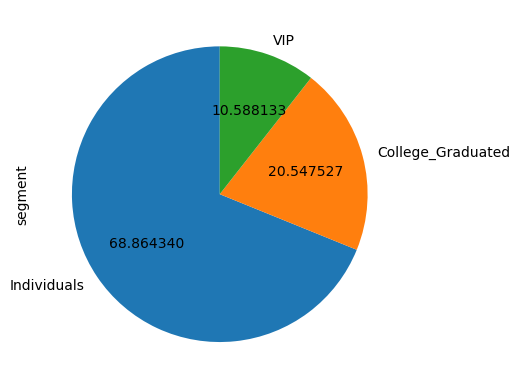

In [119]:
((active_cust1['segment'].value_counts()/active_cust1.shape[0])*100).plot(kind = 'pie',startangle = 90,autopct = '%2f')

#### Customers who remained inactive

In [120]:
inactive_cust1 = df[(df['active_inactive_start']== 0) & (df['active_inactive_end']== 0)]
inactive_cust1.shape[0]

26584

In [121]:
round(inactive_cust1['segment'].value_counts(normalize = True),2)*100

Individuals          52.0
College_Graduated    48.0
VIP                   0.0
Name: segment, dtype: float64

<Axes: ylabel='segment'>

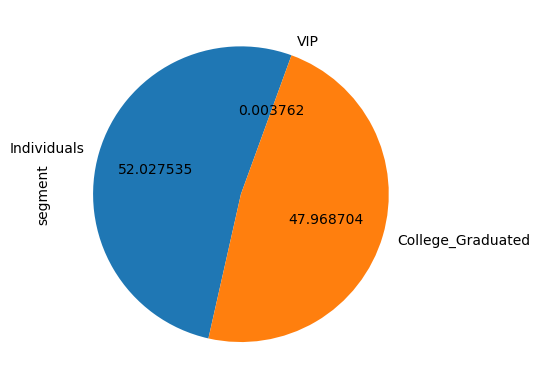

In [122]:
((inactive_cust1['segment'].value_counts()/inactive_cust1.shape[0])*100).plot(kind = 'pie',startangle = 70,autopct = '%2f')

#### Active customers who became inactive

In [123]:
actv_to_inact_cust1 = df[(df['active_inactive_start']== 1) & (df['active_inactive_end']== 0)]

In [124]:
actv_to_inact_cust1.shape[0]

2098

In [125]:
round(actv_to_inact_cust1['segment'].value_counts(normalize = True),2)*100

Individuals          73.0
College_Graduated    26.0
VIP                   1.0
Name: segment, dtype: float64

<Axes: ylabel='segment'>

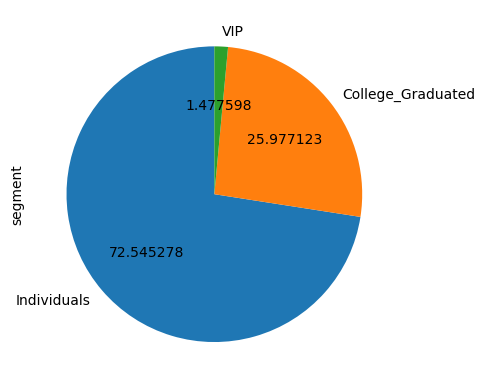

In [126]:
((actv_to_inact_cust1['segment'].value_counts()/actv_to_inact_cust1.shape[0])*100).plot(kind = 'pie',startangle = 90,autopct = '%2f')

#### Inactive customers who became active

In [127]:
inact_to_actv_cust1 = df[(df['active_inactive_start']== 0) & (df['active_inactive_end']== 1)]
inact_to_actv_cust1.shape[0]

2438

In [128]:
round(inact_to_actv_cust1['segment'].value_counts(normalize = True),2)*100


Individuals          61.0
College_Graduated    39.0
VIP                   0.0
Name: segment, dtype: float64

<Axes: ylabel='segment'>

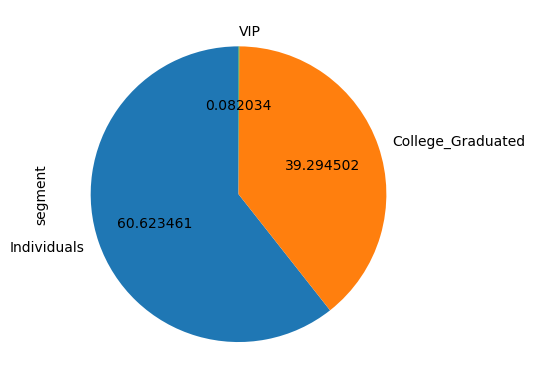

In [129]:
((inact_to_actv_cust1['segment'].value_counts()/inact_to_actv_cust1.shape[0])*100).plot(kind = 'pie',startangle = 90,autopct = '%2f')

### Section 05: Open-ended questions and recommendations 

#### 1. In future which of the customer segments (college, individual, VIP) can be expected to remain active compared to others?


<Axes: ylabel='segment'>

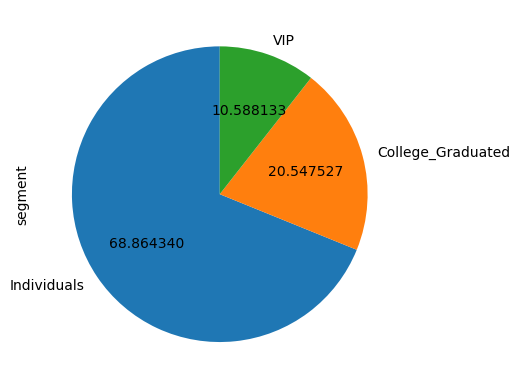

In [130]:
((active_cust1['segment'].value_counts()/active_cust1.shape[0])*100).plot(kind = 'pie',startangle = 90,autopct = '%2f')

#### 2. In future which of the customer segments (college, individual, VIP) can be expected to remain inactive compared to others?

<Axes: ylabel='segment'>

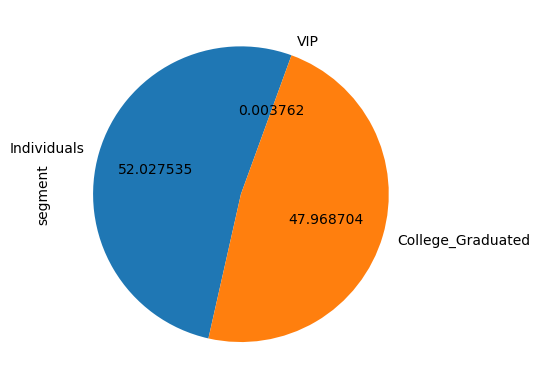

In [132]:
((inactive_cust1['segment'].value_counts()/inactive_cust1.shape[0])*100).plot(kind = 'pie',startangle = 70,autopct = '%2f')

#### 3. In future, which of the customer segments (college, individual, VIP) can be expected to become inactive compared to others?

<Axes: ylabel='segment'>

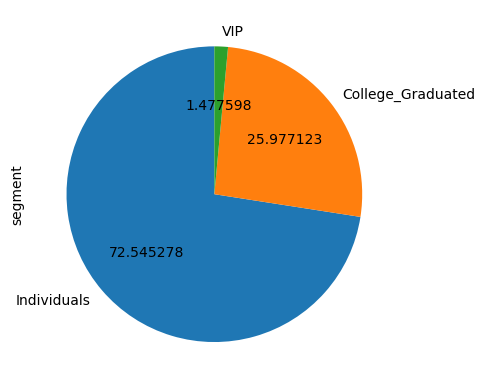

In [134]:
((actv_to_inact_cust1['segment'].value_counts()/actv_to_inact_cust1.shape[0])*100).plot(kind = 'pie',startangle = 90,autopct = '%2f')

#### 4. Which of Male/Female customers are more stable and do not change their activity/inactivity level much?

In [136]:
df['Active to Inactive'] = df['active_inactive_start'].apply(lambda x: 'Active' if x == 1 else 'Inactive')

C:\Users\hp\AppData\Local\Temp\ipykernel_4236\62352734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Active to Inactive'] = df['active_inactive_start'].apply(lambda x: 'Active' if x == 1 else 'Inactive')


In [137]:
df['Inactive to Active'] = df['active_inactive_end'].apply(lambda x: 'Active' if x == 1 else 'Inactive')

C:\Users\hp\AppData\Local\Temp\ipykernel_4236\3758731045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inactive to Active'] = df['active_inactive_end'].apply(lambda x: 'Active' if x == 1 else 'Inactive')


In [138]:
active_cust1['gender'].value_counts(normalize = True)*100

F    58.311138
M    41.688862
Name: gender, dtype: float64

In [139]:
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,Month,Active to Inactive,Inactive to Active
0,M,21,79070.91,Individuals,0,0,0,1,0,34.50,Inactive,Inactive
1,M,23,178270.68,College_Graduated,0,0,0,1,0,36.57,Inactive,Inactive
2,M,24,31243.56,College_Graduated,0,0,1,1,0,62.20,Inactive,Active
3,M,24,130740.54,College_Graduated,0,0,0,1,0,48.00,Inactive,Inactive
4,M,31,112975.17,Individuals,0,0,0,0,0,12.53,Inactive,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...
54025,M,24,47237.01,College_Graduated,0,0,1,1,0,38.23,Inactive,Active
54026,F,46,106930.05,Individuals,1,1,1,8,0,202.03,Active,Active
54027,M,24,185323.05,College_Graduated,0,0,0,0,0,60.57,Inactive,Inactive
54028,F,27,65246.79,College_Graduated,0,0,0,1,0,48.23,Inactive,Inactive


<Axes: >

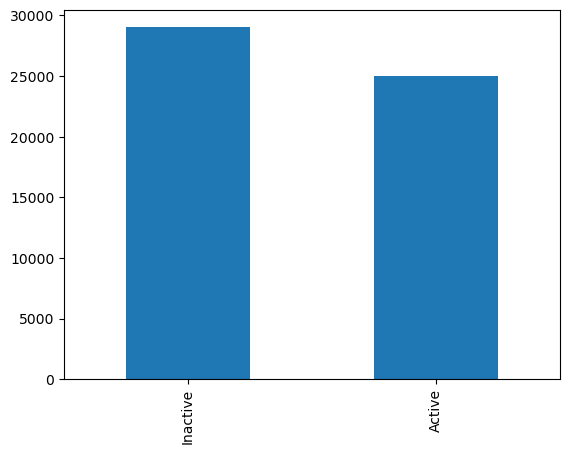

In [140]:
df['Active to Inactive'].value_counts().plot(kind = 'bar')

<Axes: >

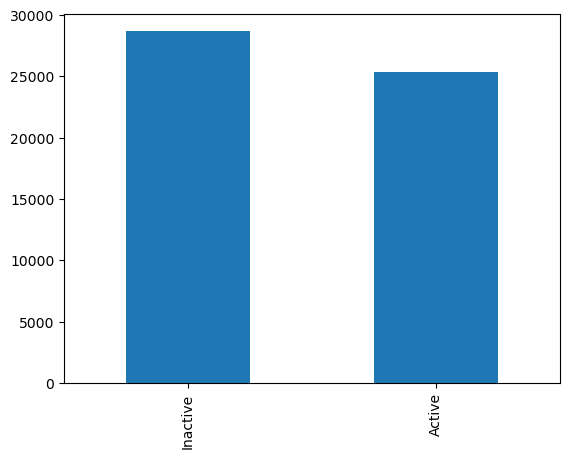

In [141]:
df['Inactive to Active'].value_counts().plot(kind = 'bar')

In [142]:
inactive_cust1['gender'].value_counts(normalize = True)*100

F    51.730364
M    48.269636
Name: gender, dtype: float64

In [143]:
actv_to_inact_cust1['gender'].value_counts()

F    1275
M     823
Name: gender, dtype: int64

In [144]:
inact_to_actv_cust1['gender'].value_counts()

F    1294
M    1144
Name: gender, dtype: int64

#### 5. Which of Male/Female customers are more volatile and change their activity/inactivity level?


#### 6. What impact does Income have on customer activity/ inactivity?


In [146]:
print("Active_Customers (Gross_Income) :"  ,active_cust1['gross_income'].mean())
print("Inactive_Customers (Gross_Income) :"  ,inactive_cust1['gross_income'].mean())
print("Active_to_Inactive_Customers (Gross_Income) :"  ,actv_to_inact_cust1['gross_income'].mean())
print("Inactive_to_Active_Customers (Gross_Income) :"  ,inact_to_actv_cust1['gross_income'].mean())

Active_Customers (Gross_Income) : 140800.2485464779
Inactive_Customers (Gross_Income) : 125685.11999209992
Active_to_Inactive_Customers (Gross_Income) : 133109.92582936108
Inactive_to_Active_Customers (Gross_Income) : 123093.65686218227


In [147]:
print("Active_Customers (Gross_Income - Gender Based)  :"  ,active_cust1['gross_income'].groupby(active_cust1['gender']).mean())
print("Inactive_Customers (Gross_Income - Gender Based) :"  ,inactive_cust1['gross_income'].groupby(inactive_cust1['gender']).mean())
print("Active_to_Inactive_Customers (Gross_Income - Gender Based) :"  ,actv_to_inact_cust1['gross_income'].groupby(actv_to_inact_cust1['gender']).mean())
print("Inactive_to_Active_Customers (Gross_Income - Gender Based) :"  ,inact_to_actv_cust1['gross_income'].groupby(inact_to_actv_cust1['gender']).mean())


Active_Customers (Gross_Income - Gender Based)  : gender
F    139230.910333
M    142995.316816
Name: gross_income, dtype: float64
Inactive_Customers (Gross_Income - Gender Based) : gender
F    127779.646536
M    123440.424775
Name: gross_income, dtype: float64
Active_to_Inactive_Customers (Gross_Income - Gender Based) : gender
F    138336.033224
M    125013.586914
Name: gross_income, dtype: float64
Inactive_to_Active_Customers (Gross_Income - Gender Based) : gender
F    126739.154815
M    118970.165297
Name: gross_income, dtype: float64


In [148]:
print("Active_Customers (Gross_Income - Segment Based)  :"  ,active_cust1['gross_income'].groupby(active_cust1['segment']).mean())
print("Inactive_Customers (Gross_Income - Segment Based) :"  ,inactive_cust1['gross_income'].groupby(inactive_cust1['segment']).mean())
print("Active_to_Inactive_Customers (Gross_Income - Segment Based) :"  ,actv_to_inact_cust1['gross_income'].groupby(actv_to_inact_cust1['segment']).mean())
print("Inactive_to_Active_Customers (Gross_Income - Segment Based) :"  ,inact_to_actv_cust1['gross_income'].groupby(inact_to_actv_cust1['segment']).mean())


Active_Customers (Gross_Income - Segment Based)  : segment
College_Graduated    120964.497705
Individuals          141287.424609
VIP                  176125.321781
Name: gross_income, dtype: float64
Inactive_Customers (Gross_Income - Segment Based) : segment
College_Graduated    113454.434882
Individuals          136944.602709
VIP                  361476.180000
Name: gross_income, dtype: float64
Active_to_Inactive_Customers (Gross_Income - Segment Based) : segment
College_Graduated    102603.323394
Individuals          143941.287576
VIP                  137650.756452
Name: gross_income, dtype: float64
Inactive_to_Active_Customers (Gross_Income - Segment Based) : segment
College_Graduated    104175.752004
Individuals          135300.243166
VIP                  164102.805000
Name: gross_income, dtype: float64


#### 7. What impact does Age have on customer activity/ inactivity?


In [150]:
print("Active_Customers (Age) :"  ,active_cust1['age'].mean())
print("Inactive_Customers (Age) :"  ,inactive_cust1['age'].mean())
print("Active_to_Inactive_Customers (Age) :"  ,actv_to_inact_cust1['age'].mean())
print("Inactive_to_Active_Customers (Age) :"  ,inact_to_actv_cust1['age'].mean())

Active_Customers (Age) : 43.7042745491857
Inactive_Customers (Age) : 37.609012940114354
Active_to_Inactive_Customers (Age) : 43.93231649189705
Inactive_to_Active_Customers (Age) : 39.440525020508616


In [151]:
print("Active_Customers (Age - Gender Based)  :"  ,active_cust1['age'].groupby(active_cust1['gender']).mean())
print("Inactive_Customers (Age - Gender Based) :"  ,inactive_cust1['age'].groupby(inactive_cust1['gender']).mean())
print("Active_to_Inactive_Customers (Age - Gender Based) :"  ,actv_to_inact_cust1['age'].groupby(actv_to_inact_cust1['gender']).mean())
print("Inactive_to_Active_Customers (Age - Gender Based) :"  ,inact_to_actv_cust1['age'].groupby(inact_to_actv_cust1['gender']).mean())


Active_Customers (Age - Gender Based)  : gender
F    44.802845
M    42.167679
Name: age, dtype: float64
Inactive_Customers (Age - Gender Based) : gender
F    39.910922
M    35.142067
Name: age, dtype: float64
Active_to_Inactive_Customers (Age - Gender Based) : gender
F    46.412549
M    40.089915
Name: age, dtype: float64
Inactive_to_Active_Customers (Age - Gender Based) : gender
F    41.952859
M    36.598776
Name: age, dtype: float64


In [152]:
print("Active_Customers (Age - Segment Based)  :"  ,active_cust1['age'].groupby(active_cust1['segment']).mean())
print("Inactive_Customers (Age - Segment Based) :"  ,inactive_cust1['age'].groupby(inactive_cust1['segment']).mean())
print("Active_to_Inactive_Customers (Age - Segment Based) :"  ,actv_to_inact_cust1['age'].groupby(actv_to_inact_cust1['segment']).mean())
print("Inactive_to_Active_Customers (Age - Segment Based) :"  ,inact_to_actv_cust1['age'].groupby(inact_to_actv_cust1['segment']).mean())


Active_Customers (Age - Segment Based)  : segment
College_Graduated    24.973013
Individuals          47.569807
VIP                  54.913402
Name: age, dtype: float64
Inactive_Customers (Age - Segment Based) : segment
College_Graduated    24.267723
Individuals          49.908611
VIP                  50.000000
Name: age, dtype: float64
Active_to_Inactive_Customers (Age - Segment Based) : segment
College_Graduated    23.216514
Individuals          51.063732
VIP                  58.000000
Name: age, dtype: float64
Inactive_to_Active_Customers (Age - Segment Based) : segment
College_Graduated    24.063674
Individuals          49.386333
VIP                  55.000000
Name: age, dtype: float64


#### 8. What impact does Duration has on customer activity/ inactivity?

In [154]:
print("Active_Customers (Month) :"  ,active_cust1['Month'].mean())
print("Inactive_Customers (Month) :"  ,inactive_cust1['Month'].mean())
print("Active_to_Inactive_Customers (Month) :"  ,actv_to_inact_cust1['Month'].mean())
print("Inactive_to_Active_Customers (Month) :"  ,inact_to_actv_cust1['Month'].mean())

Active_Customers (Month) : 110.16103130594269
Inactive_Customers (Month) : 85.36984501956084
Active_to_Inactive_Customers (Month) : 114.24836510962821
Inactive_to_Active_Customers (Month) : 88.27490566037713


In [155]:
print("Active_Customers (Month - Gender Based)  :"  ,active_cust1['Month'].groupby(active_cust1['gender']).mean())
print("Inactive_Customers (Month - Gender Based) :"  ,inactive_cust1['Month'].groupby(inactive_cust1['gender']).mean())
print("Active_to_Inactive_Customers (Month - Gender Based) :"  ,actv_to_inact_cust1['Month'].groupby(actv_to_inact_cust1['gender']).mean())
print("Inactive_to_Active_Customers (Month - Gender Based) :"  ,inact_to_actv_cust1['Month'].groupby(inact_to_actv_cust1['gender']).mean())

Active_Customers (Month - Gender Based)  : gender
F    116.891590
M    100.746849
Name: Month, dtype: float64
Inactive_Customers (Month - Gender Based) : gender
F    94.843259
M    75.217227
Name: Month, dtype: float64
Active_to_Inactive_Customers (Month - Gender Based) : gender
F    127.769169
M     93.301798
Name: Month, dtype: float64
Inactive_to_Active_Customers (Month - Gender Based) : gender
F    96.595456
M    78.863374
Name: Month, dtype: float64


In [156]:
print("Active_Customers (Month - Segment Based)  :"  ,active_cust1['Month'].groupby(active_cust1['segment']).mean())
print("Inactive_Customers (Month - Segment Based) :"  ,inactive_cust1['Month'].groupby(inactive_cust1['segment']).mean())
print("Active_to_Inactive_Customers (Month - Segment Based) :"  ,actv_to_inact_cust1['Month'].groupby(actv_to_inact_cust1['segment']).mean())
print("Inactive_to_Active_Customers (Month - Segment Based) :"  ,inact_to_actv_cust1['Month'].groupby(inact_to_actv_cust1['segment']).mean())


Active_Customers (Month - Segment Based)  : segment
College_Graduated     45.903632
Individuals          123.228357
VIP                  149.871328
Name: Month, dtype: float64
Inactive_Customers (Month - Segment Based) : segment
College_Graduated     41.004793
Individuals          126.269116
VIP                  150.700000
Name: Month, dtype: float64
Active_to_Inactive_Customers (Month - Segment Based) : segment
College_Graduated     31.569523
Individuals          144.652595
VIP                   75.046129
Name: Month, dtype: float64
Inactive_to_Active_Customers (Month - Segment Based) : segment
College_Graduated     42.386054
Individuals          118.105332
VIP                   24.350000
Name: Month, dtype: float64


# Analysis:

## By looking at all the above graphs segment wise we can infer thatMale College Graduates seems to be unstable and inactive compared to other segments.


## By the above graphs we can infer that Female Individuals with the average age of 45 seem to be most stable and active user


## By the above graph/analysis, we can infer that the longer the customer stays with the bank the more products they seem to buy from the bank and stay more active compared with others



## From the above graphs we can see that the bank has issued loans to only 1% of the customers from which most of it is utilized by VIPs.

## So if the banks choose to approach by issuing more loans to avoid churn its feasible to concentrate on female VIPs  as they tend to take more loans



# CONCLUSION

# The final conclusion is that if the bank wants to retain the customers from their existing segments the bank  should concentrate on the Female individuals whose average age is 45 with highest duration with the bank as they seem to be most active and stable customers.
# By analysing all the approaches above we can conclude that if the bank wants to avoid churn it would have to ignore retaining more college graduates who are most unstable and inactive users
